# Dissertation Code - Flood & Fire Action Analysis

In [2]:
#Importing the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
action_df = pd.read_excel('/Users/motunrayoajia/Downloads/Siaya_UPV_Utterances.xls', sheet_name='Action Analysis')

In [4]:
#Action Analysis
#1. Connectedness

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df['How well connected do you feel within the community?'] = pd.Categorical(action_df['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_grouped_df = action_df.groupby(['Category of Flood Actions', 'How well connected do you feel within the community?']).size().unstack(fill_value=0)

action_grouped_df = action_grouped_df.transpose()

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df['How well connected do you feel within the community?'] = pd.Categorical(action_df['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

total_counts = action_df.groupby('How well connected do you feel within the community?')['Category of Flood Actions'].count()
percentage_df = action_grouped_df.div(total_counts, axis=0) * 100

# Create a new DataFrame with the same columns and index as the original DataFrame

flood_action_values = {
    'Direct Action': 3,
    'Ask for help': 2,
    'Migration': 1,
    'None': 0
}

multiplied_df = pd.DataFrame(columns=percentage_df.columns, index=percentage_df.index)

# Perform the multiplication
for column in percentage_df.columns:
    multiplied_df[column] = percentage_df[column] * flood_action_values[column]

multiplied_df

multiplied_df['Social Connections'] = multiplied_df.sum(axis=1)

multiplied_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How well connected do you feel within the community?': 'Category', 'Social Connections': 'Adaptive Capacity'}
multiplied_df = multiplied_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_df['Determinants'] = "Social Connections"
multiplied_df

#Create a df with only the first two
conn_df = multiplied_df[['Determinants', 'Category', 'Adaptive Capacity']]
conn_df

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Social Connections,Very connected,170.666667
1,Social Connections,Connected,214.516129
2,Social Connections,Somewhat connected,172.222222
3,Social Connections,Not connected at all,150.000000


In [5]:
#2. Gender

# Group by "category of actions" and "connectedness" and count the occurrences
action_gend_grouped_df = action_df.groupby(['Category of Flood Actions','What is your gender?']).size().unstack(fill_value=0)

action_gend_grouped_df = action_gend_grouped_df.transpose()

total_gend_counts = action_df.groupby('What is your gender?')['Category of Flood Actions'].count()
percent_gend_df = action_gend_grouped_df.div(total_gend_counts, axis=0) * 100


multiplied_gend_df = pd.DataFrame(columns=percent_gend_df.columns, index=percent_gend_df.index)

# Perform the multiplication
for column in percent_gend_df.columns:
    multiplied_gend_df[column] = percent_gend_df[column] * flood_action_values[column]

multiplied_gend_df

multiplied_gend_df['Gender'] = multiplied_gend_df.sum(axis=1)

multiplied_gend_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is your gender?': 'Category', 'Gender': 'Adaptive Capacity'}
multiplied_gend_df = multiplied_gend_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_gend_df['Determinants'] = "Gender"
multiplied_gend_df

#Create a df with only the first two
gend_df = multiplied_gend_df[['Determinants', 'Category', 'Adaptive Capacity']]
gend_df

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Gender,Female,198.295455
1,Gender,Male,174.107143


In [6]:
#3. Education

custom_edu_order = ['No education','Primary', 'Secondary', 'Tertiary', 'Higher eduction']

action_df['What is the highest level of education have you completed?'] = pd.Categorical(action_df['What is the highest level of education have you completed?'], categories = custom_edu_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_edu_grouped_df = action_df.groupby(['Category of Flood Actions', 'What is the highest level of education have you completed?']).size().unstack(fill_value=0)

action_edu_grouped_df = action_edu_grouped_df.transpose()


#Stacked Bar chart for Education
#action_df['What is the highest level of education have you completed?'] = pd.Categorical(action_df['What is the highest level of education have you completed?'], categories=custom_edu_order, ordered=True)

total_edu_counts = action_df.groupby('What is the highest level of education have you completed?')['Category of Flood Actions'].count()
percent_edu_df = action_edu_grouped_df.div(total_edu_counts, axis=0) * 100


multiplied_edu_df = pd.DataFrame(columns=percent_edu_df.columns, index=percent_edu_df.index)

# Perform the multiplication
for column in percent_edu_df.columns:
    multiplied_edu_df[column] = percent_edu_df[column] * flood_action_values[column]

multiplied_edu_df['Education'] = multiplied_edu_df.sum(axis=1)

multiplied_edu_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is the highest level of education have you completed?': 'Category', 'Education': 'Adaptive Capacity'}
multiplied_edu_df = multiplied_edu_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_edu_df['Determinants'] = "Education"
multiplied_edu_df

#Create a df with only the first two
edu_df = multiplied_edu_df[['Determinants', 'Category', 'Adaptive Capacity']]
edu_df

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Education,No education,195.000000
1,Education,Primary,181.142857
2,Education,Secondary,191.891892
3,Education,Tertiary,244.444444
4,Education,Higher eduction,257.142857


In [7]:
#4. Income
# Convert "connectedness" column to categorical with custom order
custom_income_order =  ["500 - 2000", "2001 - 5000", "5001 - 10000", "10001 - 20000", "20001 - 40000", ">40000" ]

action_df['Income Category'] = pd.Categorical(action_df['Income Category'], categories = custom_income_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_income_grouped_df = action_df.groupby(['Income Category', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Income
action_df['Income Category'] = pd.Categorical(action_df['Income Category'], categories=custom_income_order, ordered=True)

total_income_counts = action_df.groupby('Income Category')['Category of Flood Actions'].count()
percent_income_df = action_income_grouped_df.div(total_income_counts, axis=0) * 100

multiplied_income_df = pd.DataFrame(columns=percent_income_df.columns, index=percent_income_df.index)

# Perform the multiplication
for column in percent_income_df.columns:
    multiplied_income_df[column] = percent_income_df[column] * flood_action_values[column]

multiplied_income_df

multiplied_income_df['Income'] = multiplied_income_df.sum(axis=1)

multiplied_income_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Income Category': 'Category', 'Income': 'Adaptive Capacity'}
multiplied_income_df = multiplied_income_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_income_df['Determinants'] = "Income"
multiplied_income_df

#Create a df with only the first two
income_df = multiplied_income_df[['Determinants', 'Category', 'Adaptive Capacity']]
income_df

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Income,500 - 2000,182.530120
1,Income,2001 - 5000,198.461538
2,Income,5001 - 10000,240.625000
3,Income,10001 - 20000,150.000000
4,Income,20001 - 40000,60.000000
5,Income,>40000,200.000000


In [8]:
#5. Trust
# Group by "category of actions" and "trust" and count the occurrences
action_trust_grouped_df = action_df.groupby(['Trust', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Trust

total_trust_counts = action_df.groupby('Trust')['Category of Flood Actions'].count()
percent_trust_df = action_trust_grouped_df.div(total_trust_counts, axis=0) * 100

multiplied_trust_df = pd.DataFrame(columns=percent_trust_df.columns, index=percent_trust_df.index)

# Perform the multiplication
for column in percent_trust_df.columns:
    multiplied_trust_df[column] = percent_trust_df[column] * flood_action_values[column]

multiplied_trust_df

multiplied_trust_df['Trust_'] = multiplied_trust_df.sum(axis=1)

multiplied_trust_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Trust': 'Category', 'Trust_': 'Adaptive Capacity'}
multiplied_trust_df = multiplied_trust_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_trust_df['Determinants'] = "Trust"
multiplied_trust_df

#Create a df with only the first two
trust_df = multiplied_trust_df[['Determinants', 'Category', 'Adaptive Capacity']]
trust_df

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Trust,Most people can be trusted,206.666667
1,Trust,One should trust but needs to be careful,189.071038
2,Trust,You can't trust anyone,175.000000


In [9]:
#6. Perception
# Convert "access to information" column to categorical with custom order

action_perc_grouped_df = action_df.groupby(['Are you worried about climate change?', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Information/Perception
#action_df['Information'] = pd.Categorical(action_df['How well connected do you feel within the community?'], categories=custom_income_order, ordered=True)

total_perc_counts = action_df.groupby('Are you worried about climate change?')['Category of Flood Actions'].count()
percent_perc_df = action_perc_grouped_df.div(total_perc_counts, axis=0) * 100


multiplied_perc_df = pd.DataFrame(columns=percent_perc_df.columns, index=percent_perc_df.index)

# Perform the multiplication
for column in percent_perc_df.columns:
    multiplied_perc_df[column] = percent_perc_df[column] * flood_action_values[column]

multiplied_perc_df

multiplied_perc_df['Perception'] = multiplied_perc_df.sum(axis=1)

multiplied_perc_df

multiplied_perc_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Are you worried about climate change?': 'Category', 'Perception': 'Adaptive Capacity'}
multiplied_perc_df = multiplied_perc_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_perc_df['Determinants'] = "Perception"
multiplied_perc_df

#Create a df with only the first two
perc_df = multiplied_perc_df[['Determinants', 'Category', 'Adaptive Capacity']]
perc_df

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Perception,No,182.50000
1,Perception,Yes,192.53112


In [10]:
#7. Age

# Convert "age" column to categorical with custom order
custom_age_order =  ["16-24", "25-34", "35-44", "45-54", "55-64", ">65"]

action_df['Age Category'] = pd.Categorical(action_df['Age Category'], categories = custom_age_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_age_grouped_df = action_df.groupby(['Age Category', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Age
total_age_counts = action_df.groupby('Age Category')['Category of Flood Actions'].count()
percent_age_df = action_age_grouped_df.div(total_age_counts, axis=0) * 100

multiplied_age_df = pd.DataFrame(columns=percent_age_df.columns, index=percent_age_df.index)

# Perform the multiplication
for column in percent_age_df.columns:
    multiplied_age_df[column] = percent_age_df[column] * flood_action_values[column]

multiplied_age_df

multiplied_age_df['Age'] = multiplied_age_df.sum(axis=1)

multiplied_age_df

multiplied_age_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Age Category': 'Category', 'Age': 'Adaptive Capacity'}
multiplied_age_df = multiplied_age_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_age_df['Determinants'] = "Age"
multiplied_age_df

#Create a df with only the first two
age_df = multiplied_age_df[['Determinants', 'Category', 'Adaptive Capacity']]
age_df

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Age,16-24,160.000000
1,Age,25-34,169.387755
2,Age,35-44,193.220339
3,Age,45-54,201.612903
4,Age,55-64,180.851064
5,Age,>65,205.882353


In [11]:
#8. Info 1 - TV

custom_info_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df['How often do you watch TV?'] = pd.Categorical(action_df['How often do you watch TV?'], categories = custom_info_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info_grouped_df = action_df.groupby(['How often do you watch TV?', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 1
action_df['How often do you watch TV?'] = pd.Categorical(action_df['How often do you watch TV?'], categories=custom_info_order, ordered=True)

total_info_counts = action_df.groupby('How often do you watch TV?')['Category of Flood Actions'].count()
percent_info_df = action_info_grouped_df.div(total_info_counts, axis=0) * 100

multiplied_info_df = pd.DataFrame(columns=percent_info_df.columns, index=percent_info_df.index)

# Perform the multiplication
for column in percent_info_df.columns:
    multiplied_info_df[column] = percent_info_df[column] * flood_action_values[column]

multiplied_info_df

multiplied_info_df['TV Usage'] = multiplied_info_df.sum(axis=1)

multiplied_info_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you watch TV?': 'Category', 'TV Usage': 'Adaptive Capacity'}
multiplied_info_df = multiplied_info_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info_df['Determinants'] = "TV Usage"
multiplied_info_df

#Create a df with only the first two
info_df = multiplied_info_df[['Determinants', 'Category', 'Adaptive Capacity']]
info_df

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,TV Usage,Every day,186.250000
1,TV Usage,2-3 times week,219.047619
2,TV Usage,Once a week,250.000000
3,TV Usage,Occasionally,200.000000
4,TV Usage,Never,178.625954


In [12]:
#9. Info Access 2 - Radio

custom_info2_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df['How often do you listen to the Radio?'] = pd.Categorical(action_df['How often do you listen to the Radio?'], categories = custom_info2_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info2_grouped_df = action_df.groupby(['How often do you listen to the Radio?', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 2
action_df['How often do you listen to the Radio?'] = pd.Categorical(action_df['How often do you listen to the Radio?'], categories=custom_info2_order, ordered=True)

total_info2_counts = action_df.groupby('How often do you listen to the Radio?')['Category of Flood Actions'].count()
percent_info2_df = action_info2_grouped_df.div(total_info2_counts, axis=0) * 100

multiplied_info2_df = pd.DataFrame(columns=percent_info2_df.columns, index=percent_info2_df.index)

# Perform the multiplication
for column in percent_info2_df.columns:
    multiplied_info2_df[column] = percent_info2_df[column] * flood_action_values[column]

multiplied_info2_df['Radio Usage'] = multiplied_info2_df.sum(axis=1)

multiplied_info2_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you listen to the Radio?': 'Category', 'Radio Usage': 'Adaptive Capacity'}
multiplied_info2_df = multiplied_info2_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info2_df['Determinants'] = "Radio Usage"
multiplied_info2_df

#Create a df with only the first two
info2_df = multiplied_info2_df[['Determinants', 'Category', 'Adaptive Capacity']]
info2_df

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Radio Usage,Every day,184.567901
1,Radio Usage,2-3 times week,204.347826
2,Radio Usage,Once a week,200.000000
3,Radio Usage,Occasionally,188.095238
4,Radio Usage,Never,194.545455


In [13]:
#10. Disability

# Group by "Disability" and "Category of Flood Actions" 
action_dis_grouped_df = action_df.groupby(['Do you have a disability?', 'Category of Flood Actions']).size().unstack(fill_value=0)


#Stacked Bar Chart for Disability

total_dis_counts = action_df.groupby('Do you have a disability?')['Category of Flood Actions'].count()
percent_dis_df = action_dis_grouped_df.div(total_dis_counts, axis=0) * 100


multiplied_dis_df = pd.DataFrame(columns=percent_dis_df.columns, index=percent_dis_df.index)

# Perform the multiplication
for column in percent_dis_df.columns:
    multiplied_dis_df[column] = percent_dis_df[column] * flood_action_values[column]

multiplied_dis_df

multiplied_dis_df['Disability'] = multiplied_dis_df.sum(axis=1)

multiplied_dis_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Do you have a disability?': 'Category', 'Disability': 'Adaptive Capacity'}
multiplied_dis_df = multiplied_dis_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_dis_df['Determinants'] = "Disability"
multiplied_dis_df

#Create a df with only the first two
dis_df = multiplied_dis_df[['Determinants', 'Category', 'Adaptive Capacity']]
dis_df

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Disability,No,188.931298
1,Disability,Yes,184.000000


In [14]:
dfs = [conn_df, gend_df, edu_df, income_df, trust_df, perc_df, age_df, info_df, info2_df, dis_df]  # List of DataFrames

# Concatenate the DataFrames vertically
combined_df_siaya_flood = pd.concat(dfs, ignore_index=True)
combined_df_siaya_flood

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Social Connections,Very connected,170.666667
1,Social Connections,Connected,214.516129
2,Social Connections,Somewhat connected,172.222222
3,Social Connections,Not connected at all,150.000000
4,Gender,Female,198.295455
5,Gender,Male,174.107143
6,Education,No education,195.000000
7,Education,Primary,181.142857
8,Education,Secondary,191.891892
9,Education,Tertiary,244.444444


# Machakos County

In [15]:
action_df = pd.read_excel('/Users/motunrayoajia/Downloads/Kenya interviews.xlsx')

action_df2 = action_df[action_df['County Name'] == 'Machakos (Kenya)']
action_df2

,Interview ID,Date Time,You selected other – Who can you consult in case of health issues?,Who can you mainly consult in case of health issues?,How often do you access health care treatment?,How long does it take you to travel to receive healthcare?,Where do you receive health care treatment?,You chose other: How often do you access health care treatment?,You chose other: Where do you receive health care treatment?,You chose other: Who can you mainly consult in case of health issues?,...,Please describe what you would do (actions you take) in case of a flood..1,Have you experienced fire in your home?,(If yes) describe how are you were affected by fire?,Who would you contact incase of a fire?,You chose other: Who would you contact incase of a fire?,Please describe what you would do (actions you take) in case of fire.,Category of Fire Actions,Which of the following items do you have access to in your daily life?,"Which 5 items are most important to you in your daily life? Please indicate these in order of importance, starting with the most important",What is your main water source?
1,641060a2d9d62dde365c16ee,2023-03-14 11:55:14,NaN,Nurse,Once a month,30.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Neighbour,NaN,we would scream and call the neighbors to come...,Ask for help,"Bible,Clothes,Electricity,Furniture,House,Jerr...","Bible,Borehole,Clothes,Furniture,House",Private Tap
2,641060daef9459ae683d3293,2023-03-14 11:56:10,NaN,Doctor,Rarely,10.0,Outside your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Family,NaN,"Dincase of fire,we do not have any good method...",Direct Action,"Battery,Bible,Clothes,Corrugated Iron Sheet,Do...","Clothes,Hospital,School,Water,House","River, Pond or Lake"
3,64106b75b3f79502d27f4066,2023-03-14 12:41:25,NaN,Nurse,Once a month,30.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Neighbour,NaN,To call people for help to extinguish fire.,Ask for help,"Bible,Clothes,Electricity,Furniture,House,Jerr...","Bible,Clothes,Gas Stove,Mobile Phone,Money",Private Tap
4,64106fa7d9d62dde365c170d,2023-03-14 12:59:19,NaN,Health Provider,Rarely,30.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Neighbour,NaN,"Kuwa mbu, Kukuna simu, lakini munomuno nundu s...",Ask for help,"Bible,Bike,Car,Corrugated Iron Sheet,Donkey an...","Car,Corrugated Iron Sheet,Computer,Electricity...","River, Pond or Lake"
7,641078b1b3f79502d27f4091,2023-03-14 13:37:53,NaN,Health Provider,Rarely,10.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Neighbour,NaN,"I cut trees to fight fire,look for water and e...",Direct Action,"Bible,Borehole,Clothes,Corrugated Iron Sheet,E...","Furniture,House,Jerrycan,Solar PV System,Veget...",Well or Borehole (manual pump)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,6426baaab363541cdcb0b692,2023-03-31 10:49:14,NaN,Nurse,Rarely,30.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Neighbour,NaN,In case of fire I would scream so that my neig...,Ask for help,"Bible,Clothes,Electricity,Furniture,House,Jerr...","Clothes,Electricity,Furniture,House,Borehole",Private Tap
966,6426bddef2313a3fba3c9d4d,2023-03-31 11:02:54,NaN,Health Provider,Rarely,15.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,"Friends,Family",NaN,"In case of fire, i would scream and call peopl...",Ask for help,"Bible,Clothes,House,Furniture,Jerrycan,Kerosen...","Water,Clothes,Money,Bible,House","River, Pond or Lake"
968,6426c0f705ddbedbdb1b218e,2023-03-31 11:16:07,NaN,Doctor,Rarely,30.0,Outside your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,"Family,Friends",NaN,"If there is a fire, I call the fire extinguish...",Ask for help,"Clothes,Corrugated Iron Sheet,Doctor,Electrici...","Clothes,Jerrycan,House,Torch,Hospital","River, Pond or Lake"
978,6426dd056ea2c0b287445aad,2023-03-31 13:15:49,NaN,Health Provider,Once a month,10.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Neighbour,NaN,"We tell people to come and put out the fire, a...",Ask for help,"Bible,Borehole,

In [16]:
#1. Connectedness

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df2['How well connected do you feel within the community?'] = pd.Categorical(action_df2['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_grouped_df = action_df2.groupby(['Category of Flood Actions', 'How well connected do you feel within the community?']).size().unstack(fill_value=0)

action_grouped_df = action_grouped_df.transpose()

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df2['How well connected do you feel within the community?'] = pd.Categorical(action_df2['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

total_counts = action_df2.groupby('How well connected do you feel within the community?')['Category of Flood Actions'].count()
percentage_df = action_grouped_df.div(total_counts, axis=0) * 100

# Create a new DataFrame with the same columns and index as the original DataFrame

flood_action_values = {
    'Direct Action': 3,
    'Ask for help': 2,
    'Migration': 1,
    'None': 0
}

multiplied_df = pd.DataFrame(columns=percentage_df.columns, index=percentage_df.index)

# Perform the multiplication
for column in percentage_df.columns:
    multiplied_df[column] = percentage_df[column] * flood_action_values[column]

multiplied_df

multiplied_df['Social Connections'] = multiplied_df.sum(axis=1)

multiplied_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How well connected do you feel within the community?': 'Category', 'Social Connections': 'Adaptive Capacity'}
multiplied_df = multiplied_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_df['Determinants'] = "Social Connections"
multiplied_df

#Create a df with only the first two
conn_df2 = multiplied_df[['Determinants', 'Category', 'Adaptive Capacity']]
conn_df2

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/2377882608.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df2['How well connected do you feel within the community?'] = pd.Categorical(action_df2['How well connected do you feel within the community?'], categories=custom_order, ordered=True)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/2377882608.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df2['How well connected do you feel within the community?

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Social Connections,Very connected,125.862069
1,Social Connections,Connected,110.599078
2,Social Connections,Somewhat connected,104.687500
3,Social Connections,Not connected at all,116.666667


In [17]:
#2. Gender

# Group by "category of actions" and "connectedness" and count the occurrences
action_gend_grouped_df = action_df2.groupby(['Category of Flood Actions','What is your gender?']).size().unstack(fill_value=0)

action_gend_grouped_df = action_gend_grouped_df.transpose()


total_gend_counts = action_df2.groupby('What is your gender?')['Category of Flood Actions'].count()
percent_gend_df = action_gend_grouped_df.div(total_gend_counts, axis=0) * 100


multiplied_gend_df = pd.DataFrame(columns=percent_gend_df.columns, index=percent_gend_df.index)

# Perform the multiplication
for column in percent_gend_df.columns:
    multiplied_gend_df[column] = percent_gend_df[column] * flood_action_values[column]

multiplied_gend_df

multiplied_gend_df['Gender'] = multiplied_gend_df.sum(axis=1)

multiplied_gend_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is your gender?': 'Category', 'Gender': 'Adaptive Capacity'}
multiplied_gend_df = multiplied_gend_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_gend_df['Determinants'] = "Gender"
multiplied_gend_df

#Create a df with only the first two
gend_df2 = multiplied_gend_df[['Determinants', 'Category', 'Adaptive Capacity']]
gend_df2

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Gender,Female,111.764706
1,Gender,Male,111.250000


In [18]:
#3. Education

custom_edu_order = ['No education','Primary', 'Secondary', 'Tertiary', 'Higher eduction']

action_df2['What is the highest level of education have you completed?'] = pd.Categorical(action_df2['What is the highest level of education have you completed?'], categories = custom_edu_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_edu_grouped_df = action_df2.groupby(['Category of Flood Actions', 'What is the highest level of education have you completed?']).size().unstack(fill_value=0)

action_edu_grouped_df = action_edu_grouped_df.transpose()


#Stacked Bar chart for Education
#action_df['What is the highest level of education have you completed?'] = pd.Categorical(action_df['What is the highest level of education have you completed?'], categories=custom_edu_order, ordered=True)

total_edu_counts = action_df2.groupby('What is the highest level of education have you completed?')['Category of Flood Actions'].count()
percent_edu_df = action_edu_grouped_df.div(total_edu_counts, axis=0) * 100


multiplied_edu_df = pd.DataFrame(columns=percent_edu_df.columns, index=percent_edu_df.index)

# Perform the multiplication
for column in percent_edu_df.columns:
    multiplied_edu_df[column] = percent_edu_df[column] * flood_action_values[column]

multiplied_edu_df['Education'] = multiplied_edu_df.sum(axis=1)

multiplied_edu_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is the highest level of education have you completed?': 'Category', 'Education': 'Adaptive Capacity'}
multiplied_edu_df = multiplied_edu_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_edu_df['Determinants'] = "Education"
multiplied_edu_df

#Create a df with only the first two
edu_df2 = multiplied_edu_df[['Determinants', 'Category', 'Adaptive Capacity']]
edu_df2

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/4004445536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df2['What is the highest level of education have you completed?'] = pd.Categorical(action_df2['What is the highest level of education have you completed?'], categories = custom_edu_order, ordered=True)


Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Education,No education,100.000000
1,Education,Primary,114.285714
2,Education,Secondary,110.416667
3,Education,Tertiary,154.545455
4,Education,Higher eduction,100.000000


In [19]:
#4. Income
# Convert "connectedness" column to categorical with custom order
custom_income_order =  ["500 - 2000", "2001 - 5000", "5001 - 10000", "10001 - 20000", "20001 - 40000", ">40000" ]

action_df2['Income Category'] = pd.Categorical(action_df2['Income Category'], categories = custom_income_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_income_grouped_df = action_df2.groupby(['Income Category', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Income
action_df2['Income Category'] = pd.Categorical(action_df2['Income Category'], categories=custom_income_order, ordered=True)

total_income_counts = action_df2.groupby('Income Category')['Category of Flood Actions'].count()
percent_income_df = action_income_grouped_df.div(total_income_counts, axis=0) * 100

multiplied_income_df = pd.DataFrame(columns=percent_income_df.columns, index=percent_income_df.index)

# Perform the multiplication
for column in percent_income_df.columns:
    multiplied_income_df[column] = percent_income_df[column] * flood_action_values[column]

multiplied_income_df

multiplied_income_df['Income'] = multiplied_income_df.sum(axis=1)

multiplied_income_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Income Category': 'Category', 'Income': 'Adaptive Capacity'}
multiplied_income_df = multiplied_income_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_income_df['Determinants'] = "Income"
multiplied_income_df

#Create a df with only the first two
income_df2 = multiplied_income_df[['Determinants', 'Category', 'Adaptive Capacity']]
income_df2

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/3851366234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df2['Income Category'] = pd.Categorical(action_df2['Income Category'], categories = custom_income_order, ordered = True)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/3851366234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df2['Income Category'] = pd.Categorical(action_df2['Income Category'], categories=custom_income_order, ordered=True)


Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Income,500 - 2000,106.329114
1,Income,2001 - 5000,120.312500
2,Income,5001 - 10000,95.890411
3,Income,10001 - 20000,115.053763
4,Income,20001 - 40000,128.571429
5,Income,>40000,130.000000


In [20]:
#5. Trust
# Group by "category of actions" and "trust" and count the occurrences
action_trust_grouped_df = action_df2.groupby(['Trust', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Trust

total_trust_counts = action_df2.groupby('Trust')['Category of Flood Actions'].count()
percent_trust_df = action_trust_grouped_df.div(total_trust_counts, axis=0) * 100

multiplied_trust_df = pd.DataFrame(columns=percent_trust_df.columns, index=percent_trust_df.index)

# Perform the multiplication
for column in percent_trust_df.columns:
    multiplied_trust_df[column] = percent_trust_df[column] * flood_action_values[column]

multiplied_trust_df

multiplied_trust_df['Trust_'] = multiplied_trust_df.sum(axis=1)

multiplied_trust_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Trust': 'Category', 'Trust_': 'Adaptive Capacity'}
multiplied_trust_df = multiplied_trust_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_trust_df['Determinants'] = "Trust"
multiplied_trust_df

#Create a df with only the first two
trust_df2 = multiplied_trust_df[['Determinants', 'Category', 'Adaptive Capacity']]
trust_df2

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Trust,Most people can be trusted,103.703704
1,Trust,One should trust but needs to be careful,111.864407
2,Trust,You can't trust anyone,117.543860


In [21]:
#6. Perception
# Convert "access to information" column to categorical with custom order

action_perc_grouped_df = action_df2.groupby(['Are you worried about climate change?', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Information/Perception
#action_df['Information'] = pd.Categorical(action_df['How well connected do you feel within the community?'], categories=custom_income_order, ordered=True)

total_perc_counts = action_df2.groupby('Are you worried about climate change?')['Category of Flood Actions'].count()
percent_perc_df = action_perc_grouped_df.div(total_perc_counts, axis=0) * 100


multiplied_perc_df = pd.DataFrame(columns=percent_perc_df.columns, index=percent_perc_df.index)

# Perform the multiplication
for column in percent_perc_df.columns:
    multiplied_perc_df[column] = percent_perc_df[column] * flood_action_values[column]

multiplied_perc_df

multiplied_perc_df['Perception'] = multiplied_perc_df.sum(axis=1)

multiplied_perc_df

multiplied_perc_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Are you worried about climate change?': 'Category', 'Perception': 'Adaptive Capacity'}
multiplied_perc_df = multiplied_perc_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_perc_df['Determinants'] = "Perception"
multiplied_perc_df

#Create a df with only the first two
perc_df2 = multiplied_perc_df[['Determinants', 'Category', 'Adaptive Capacity']]
perc_df2

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Perception,No,115.151515
1,Perception,Yes,111.182109


In [22]:
#7. Age

# Convert "age" column to categorical with custom order
custom_age_order =  ["16-24", "25-34", "35-44", "45-54", "55-64", ">65"]

action_df2['Age Category'] = pd.Categorical(action_df2['Age Category'], categories = custom_age_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_age_grouped_df = action_df2.groupby(['Age Category', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Age
total_age_counts = action_df2.groupby('Age Category')['Category of Flood Actions'].count()
percent_age_df = action_age_grouped_df.div(total_age_counts, axis=0) * 100

multiplied_age_df = pd.DataFrame(columns=percent_age_df.columns, index=percent_age_df.index)

# Perform the multiplication
for column in percent_age_df.columns:
    multiplied_age_df[column] = percent_age_df[column] * flood_action_values[column]

multiplied_age_df

multiplied_age_df['Age'] = multiplied_age_df.sum(axis=1)

multiplied_age_df

multiplied_age_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Age Category': 'Category', 'Age': 'Adaptive Capacity'}
multiplied_age_df = multiplied_age_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_age_df['Determinants'] = "Age"
multiplied_age_df

#Create a df with only the first two
age_df2 = multiplied_age_df[['Determinants', 'Category', 'Adaptive Capacity']]
age_df2

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/653061478.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df2['Age Category'] = pd.Categorical(action_df2['Age Category'], categories = custom_age_order, ordered = True)


Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Age,16-24,102.857143
1,Age,25-34,111.764706
2,Age,35-44,106.410256
3,Age,45-54,119.354839
4,Age,55-64,113.432836
5,Age,>65,117.647059


In [23]:
#8. Info 1 - TV

custom_info_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df2['How often do you watch TV?'] = pd.Categorical(action_df2['How often do you watch TV?'], categories = custom_info_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info_grouped_df = action_df2.groupby(['How often do you watch TV?', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 1
action_df2['How often do you watch TV?'] = pd.Categorical(action_df2['How often do you watch TV?'], categories=custom_info_order, ordered=True)

total_info_counts = action_df2.groupby('How often do you watch TV?')['Category of Flood Actions'].count()
percent_info_df = action_info_grouped_df.div(total_info_counts, axis=0) * 100

multiplied_info_df = pd.DataFrame(columns=percent_info_df.columns, index=percent_info_df.index)

# Perform the multiplication
for column in percent_info_df.columns:
    multiplied_info_df[column] = percent_info_df[column] * flood_action_values[column]

multiplied_info_df

multiplied_info_df['TV Usage'] = multiplied_info_df.sum(axis=1)

multiplied_info_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you watch TV?': 'Category', 'TV Usage': 'Adaptive Capacity'}
multiplied_info_df = multiplied_info_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info_df['Determinants'] = "TV Usage"
multiplied_info_df

#Create a df with only the first two
info_df2 = multiplied_info_df[['Determinants', 'Category', 'Adaptive Capacity']]
info_df2

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/3354735994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df2['How often do you watch TV?'] = pd.Categorical(action_df2['How often do you watch TV?'], categories = custom_info_order, ordered = True)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/3354735994.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df2['How often do you watch TV?'] = pd.Categorical(action_df2['How often do you watch TV?'], categor

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,TV Usage,Every day,123.428571
1,TV Usage,2-3 times week,155.555556
2,TV Usage,Once a week,62.500000
3,TV Usage,Occasionally,91.836735
4,TV Usage,Never,100.943396


In [24]:
#9. Info Access 2 - Radio

custom_info2_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df2['How often do you listen to the Radio?'] = pd.Categorical(action_df2['How often do you listen to the Radio?'], categories = custom_info2_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info2_grouped_df = action_df2.groupby(['How often do you listen to the Radio?', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 2
action_df2['How often do you listen to the Radio?'] = pd.Categorical(action_df2['How often do you listen to the Radio?'], categories=custom_info2_order, ordered=True)

total_info2_counts = action_df2.groupby('How often do you listen to the Radio?')['Category of Flood Actions'].count()
percent_info2_df = action_info2_grouped_df.div(total_info2_counts, axis=0) * 100

multiplied_info2_df = pd.DataFrame(columns=percent_info2_df.columns, index=percent_info2_df.index)

# Perform the multiplication
for column in percent_info2_df.columns:
    multiplied_info2_df[column] = percent_info2_df[column] * flood_action_values[column]

multiplied_info2_df['Radio Usage'] = multiplied_info2_df.sum(axis=1)

multiplied_info2_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you listen to the Radio?': 'Category', 'Radio Usage': 'Adaptive Capacity'}
multiplied_info2_df = multiplied_info2_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info2_df['Determinants'] = "Radio Usage"
multiplied_info2_df

#Create a df with only the first two
info2_df2 = multiplied_info2_df[['Determinants', 'Category', 'Adaptive Capacity']]
info2_df2

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/4021912947.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df2['How often do you listen to the Radio?'] = pd.Categorical(action_df2['How often do you listen to the Radio?'], categories = custom_info2_order, ordered = True)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/4021912947.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df2['How often do you listen to the Radio?'] = pd.Categorical(action_df2['How

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Radio Usage,Every day,110.878661
1,Radio Usage,2-3 times week,104.545455
2,Radio Usage,Once a week,107.692308
3,Radio Usage,Occasionally,110.638298
4,Radio Usage,Never,126.923077


In [25]:
#10. Disability

# Group by "Disability" and "Category of Flood Actions" 
action_dis_grouped_df = action_df2.groupby(['Do you have a disability?', 'Category of Flood Actions']).size().unstack(fill_value=0)


#Stacked Bar Chart for Disability

total_dis_counts = action_df2.groupby('Do you have a disability?')['Category of Flood Actions'].count()
percent_dis_df = action_dis_grouped_df.div(total_dis_counts, axis=0) * 100


multiplied_dis_df = pd.DataFrame(columns=percent_dis_df.columns, index=percent_dis_df.index)

# Perform the multiplication
for column in percent_dis_df.columns:
    multiplied_dis_df[column] = percent_dis_df[column] * flood_action_values[column]

multiplied_dis_df

multiplied_dis_df['Disability'] = multiplied_dis_df.sum(axis=1)

multiplied_dis_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Do you have a disability?': 'Category', 'Disability': 'Adaptive Capacity'}
multiplied_dis_df = multiplied_dis_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_dis_df['Determinants'] = "Disability"
multiplied_dis_df

#Create a df with only the first two
dis_df2 = multiplied_dis_df[['Determinants', 'Category', 'Adaptive Capacity']]
dis_df2

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Disability,No,111.209440
1,Disability,Yes,142.857143


In [26]:
dfs2 = [conn_df2, gend_df2, edu_df2, income_df2, trust_df2, perc_df2, age_df2, info_df2, info2_df2, dis_df2]  # List of DataFrames

# Concatenate the DataFrames vertically
combined_df_ma_flood = pd.concat(dfs2, ignore_index=True)
combined_df_ma_flood

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Social Connections,Very connected,125.862069
1,Social Connections,Connected,110.599078
2,Social Connections,Somewhat connected,104.687500
3,Social Connections,Not connected at all,116.666667
4,Gender,Female,111.764706
5,Gender,Male,111.250000
6,Education,No education,100.000000
7,Education,Primary,114.285714
8,Education,Secondary,110.416667
9,Education,Tertiary,154.545455


# Narok County

In [27]:
action_df = pd.read_excel('/Users/motunrayoajia/Downloads/Kenya interviews.xlsx')

action_df3 = action_df[action_df['County Name'] == 'Narok (Kenya)']
action_df3

,Interview ID,Date Time,You selected other – Who can you consult in case of health issues?,Who can you mainly consult in case of health issues?,How often do you access health care treatment?,How long does it take you to travel to receive healthcare?,Where do you receive health care treatment?,You chose other: How often do you access health care treatment?,You chose other: Where do you receive health care treatment?,You chose other: Who can you mainly consult in case of health issues?,...,Please describe what you would do (actions you take) in case of a flood..1,Have you experienced fire in your home?,(If yes) describe how are you were affected by fire?,Who would you contact incase of a fire?,You chose other: Who would you contact incase of a fire?,Please describe what you would do (actions you take) in case of fire.,Category of Fire Actions,Which of the following items do you have access to in your daily life?,"Which 5 items are most important to you in your daily life? Please indicate these in order of importance, starting with the most important",What is your main water source?
0,64105c9cef9459ae683d3288,2023-03-14 11:38:04,NaN,Nurse,Rarely,45.0,Outside your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Neighbour,NaN,Is that phone recording you? i would call my n...,None,"Battery,Clothes,House,Furniture,Water","Clothes,House,Water,Mobile Phone,Rainwater Har...",Rainwater harvesting
5,6410778973151ce9d9cf29b9,2023-03-14 13:32:57,NaN,Nurse,Rarely,60.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Family,NaN,We can call people to extinguish the fire or t...,Ask for help,"Bible,Clothes,Disposable Sanitary Pad,House,Mo...","Bible,Clothes,House,Mobile Phone,Money","River, Pond or Lake"
17,6410908eb3f79502d27f40b6,2023-03-14 15:19:42,NaN,Doctor,Rarely,5.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Firefighter,NaN,"First of all,to take out human beings who can ...",Ask for help,"Bike,Electricity,House,Mobile Phone,Money,Wate...","Clothes,Disposable Sanitary Pad,Electricity,Bi...",Rainwater harvesting
18,641093ead9d62dde365c172f,2023-03-14 15:34:02,NaN,Nurse,Rarely,45.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Neighbour,NaN,Naa elatia ainyiototo aipotu paaponu aretotu a...,NaN,"Battery,Bible,Clothes,Corrugated Iron Sheet,Fu...","House,Clothes,Mobile Phone,Money,Hospital","River, Pond or Lake"
22,6410b6152b4f1ccaf8a9bf78,2023-03-14 17:59:49,NaN,Doctor,Rarely,50.0,Outside your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Neighbour,NaN,I apply soil or water to end the fire.,Direct Action,House,"Clothes,House,Money,Donkey and Cart,Jerrycan","River, Pond or Lake"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,6429d78cf25f954438f872ab,2023-04-02 19:29:16,NaN,Nurse,Once a month,10.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Firefighter,NaN,I will try to stop fire when l realized immedi...,Ask for help,"Battery,Bible,Clothes,Corrugated Iron Sheet,Fu...","Battery,Furniture,House,Jerrycan,Water","River, Pond or Lake"
1028,6429d7a7ea75333817b42b6b,2023-04-02 19:29:43,NaN,Doctor,Rarely,20.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Neighbour,NaN,I would tell my neighbors put off the fire and...,Ask for help,"Battery,Bible,Clothes,Donkey and Cart,Furnitur...","House,Furniture,Clothes,Bible,Battery","River, Pond or Lake"
1029,6429d7b513e64c058081f61d,2023-04-02 19:29:57,NaN,Doctor,Rarely,180.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Neighbour,NaN,Putting off fire using water,Direct Action,"Bible,House,Mobile Phone,Borehole,Clothes","Bible,House,Mobile Phone,Borehole,Clothes",Well or Borehole (manual pump)
1030,6429d7ca13e64c058081f65f,2023-04-02 19:30:18,NaN,Doctor,Once a year,30.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,"Family,Friends,Neighbour,Police",NaN,In case of fire I will cry help from neighbor...,Ask for help,"Bible,Clothes,Donkey and Cart,Electricity,Jerr...","Bible,Clothes,Donkey and Cart,Electricity,Gas ...","River, Pond or

In [28]:
#Action Analysis
#1. Connectedness

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df3['How well connected do you feel within the community?'] = pd.Categorical(action_df3['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_grouped_df = action_df3.groupby(['Category of Flood Actions', 'How well connected do you feel within the community?']).size().unstack(fill_value=0)

action_grouped_df = action_grouped_df.transpose()

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df3['How well connected do you feel within the community?'] = pd.Categorical(action_df3['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

total_counts = action_df3.groupby('How well connected do you feel within the community?')['Category of Flood Actions'].count()
percentage_df = action_grouped_df.div(total_counts, axis=0) * 100

# Create a new DataFrame with the same columns and index as the original DataFrame

flood_action_values = {
    'Direct Action': 3,
    'Ask for help': 2,
    'Migration': 1,
    'None': 0
}

multiplied_df = pd.DataFrame(columns=percentage_df.columns, index=percentage_df.index)

# Perform the multiplication
for column in percentage_df.columns:
    multiplied_df[column] = percentage_df[column] * flood_action_values[column]

multiplied_df

multiplied_df['Social Connections'] = multiplied_df.sum(axis=1)

multiplied_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How well connected do you feel within the community?': 'Category', 'Social Connections': 'Adaptive Capacity'}
multiplied_df = multiplied_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_df['Determinants'] = "Social Connections"
multiplied_df

#Create a df with only the first two
conn_df3 = multiplied_df[['Determinants', 'Category', 'Adaptive Capacity']]
conn_df3

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/400565900.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df3['How well connected do you feel within the community?'] = pd.Categorical(action_df3['How well connected do you feel within the community?'], categories=custom_order, ordered=True)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/400565900.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df3['How well connected do you feel within the community?']

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Social Connections,Very connected,128.767123
1,Social Connections,Connected,137.062937
2,Social Connections,Somewhat connected,177.272727
3,Social Connections,Not connected at all,90.000000


In [29]:
#2. Gender

# Group by "category of actions" and "connectedness" and count the occurrences
action_gend_grouped_df = action_df3.groupby(['Category of Flood Actions','What is your gender?']).size().unstack(fill_value=0)

action_gend_grouped_df = action_gend_grouped_df.transpose()


total_gend_counts = action_df3.groupby('What is your gender?')['Category of Flood Actions'].count()
percent_gend_df = action_gend_grouped_df.div(total_gend_counts, axis=0) * 100


multiplied_gend_df = pd.DataFrame(columns=percent_gend_df.columns, index=percent_gend_df.index)

# Perform the multiplication
for column in percent_gend_df.columns:
    multiplied_gend_df[column] = percent_gend_df[column] * flood_action_values[column]

multiplied_gend_df

multiplied_gend_df['Gender'] = multiplied_gend_df.sum(axis=1)

multiplied_gend_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is your gender?': 'Category', 'Gender': 'Adaptive Capacity'}
multiplied_gend_df = multiplied_gend_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_gend_df['Determinants'] = "Gender"
multiplied_gend_df

#Create a df with only the first two
gend_df3 = multiplied_gend_df[['Determinants', 'Category', 'Adaptive Capacity']]
gend_df3

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Gender,Female,145.925926
1,Gender,Male,125.862069


In [30]:
#3. Education

custom_edu_order = ['No education','Primary', 'Secondary', 'Tertiary', 'Higher eduction']

action_df3['What is the highest level of education have you completed?'] = pd.Categorical(action_df3['What is the highest level of education have you completed?'], categories = custom_edu_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_edu_grouped_df = action_df3.groupby(['Category of Flood Actions', 'What is the highest level of education have you completed?']).size().unstack(fill_value=0)

action_edu_grouped_df = action_edu_grouped_df.transpose()


#Stacked Bar chart for Education
#action_df['What is the highest level of education have you completed?'] = pd.Categorical(action_df['What is the highest level of education have you completed?'], categories=custom_edu_order, ordered=True)

total_edu_counts = action_df3.groupby('What is the highest level of education have you completed?')['Category of Flood Actions'].count()
percent_edu_df = action_edu_grouped_df.div(total_edu_counts, axis=0) * 100


multiplied_edu_df = pd.DataFrame(columns=percent_edu_df.columns, index=percent_edu_df.index)

# Perform the multiplication
for column in percent_edu_df.columns:
    multiplied_edu_df[column] = percent_edu_df[column] * flood_action_values[column]

multiplied_edu_df['Education'] = multiplied_edu_df.sum(axis=1)

multiplied_edu_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is the highest level of education have you completed?': 'Category', 'Education': 'Adaptive Capacity'}
multiplied_edu_df = multiplied_edu_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_edu_df['Determinants'] = "Education"
multiplied_edu_df

#Create a df with only the first two
edu_df3 = multiplied_edu_df[['Determinants', 'Category', 'Adaptive Capacity']]
edu_df3

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/1780199468.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df3['What is the highest level of education have you completed?'] = pd.Categorical(action_df3['What is the highest level of education have you completed?'], categories = custom_edu_order, ordered=True)


Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Education,No education,146.268657
1,Education,Primary,130.985915
2,Education,Secondary,140.579710
3,Education,Tertiary,112.500000
4,Education,Higher eduction,100.000000


In [31]:
#4. Income
# Convert "connectedness" column to categorical with custom order
custom_income_order =  ["500 - 2000", "2001 - 5000", "5001 - 10000", "10001 - 20000", "20001 - 40000", ">40000" ]

action_df3['Income Category'] = pd.Categorical(action_df3['Income Category'], categories = custom_income_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_income_grouped_df = action_df3.groupby(['Income Category', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Income
action_df3['Income Category'] = pd.Categorical(action_df3['Income Category'], categories=custom_income_order, ordered=True)

total_income_counts = action_df3.groupby('Income Category')['Category of Flood Actions'].count()
percent_income_df = action_income_grouped_df.div(total_income_counts, axis=0) * 100

multiplied_income_df = pd.DataFrame(columns=percent_income_df.columns, index=percent_income_df.index)

# Perform the multiplication
for column in percent_income_df.columns:
    multiplied_income_df[column] = percent_income_df[column] * flood_action_values[column]

multiplied_income_df

multiplied_income_df['Income'] = multiplied_income_df.sum(axis=1)

multiplied_income_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Income Category': 'Category', 'Income': 'Adaptive Capacity'}
multiplied_income_df = multiplied_income_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_income_df['Determinants'] = "Income"
multiplied_income_df

#Create a df with only the first two
income_df3 = multiplied_income_df[['Determinants', 'Category', 'Adaptive Capacity']]
income_df3

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/4236017655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df3['Income Category'] = pd.Categorical(action_df3['Income Category'], categories = custom_income_order, ordered = True)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/4236017655.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df3['Income Category'] = pd.Categorical(action_df3['Income Category'], categories=custom_income_order, ordered=True)


Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Income,500 - 2000,140.366972
1,Income,2001 - 5000,136.170213
2,Income,5001 - 10000,145.945946
3,Income,10001 - 20000,107.407407
4,Income,20001 - 40000,142.307692
5,Income,>40000,120.000000


In [32]:
#5. Trust
# Group by "category of actions" and "trust" and count the occurrences
action_trust_grouped_df = action_df3.groupby(['Trust', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Trust

total_trust_counts = action_df3.groupby('Trust')['Category of Flood Actions'].count()
percent_trust_df = action_trust_grouped_df.div(total_trust_counts, axis=0) * 100

multiplied_trust_df = pd.DataFrame(columns=percent_trust_df.columns, index=percent_trust_df.index)

# Perform the multiplication
for column in percent_trust_df.columns:
    multiplied_trust_df[column] = percent_trust_df[column] * flood_action_values[column]

multiplied_trust_df

multiplied_trust_df['Trust_'] = multiplied_trust_df.sum(axis=1)

multiplied_trust_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Trust': 'Category', 'Trust_': 'Adaptive Capacity'}
multiplied_trust_df = multiplied_trust_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_trust_df['Determinants'] = "Trust"
multiplied_trust_df

#Create a df with only the first two
trust_df3 = multiplied_trust_df[['Determinants', 'Category', 'Adaptive Capacity']]
trust_df3

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Trust,Most people can be trusted,100.000000
1,Trust,One should trust but needs to be careful,136.464088
2,Trust,You can't trust anyone,167.567568


In [33]:
#6. Perception
# Convert "access to information" column to categorical with custom order

action_perc_grouped_df = action_df3.groupby(['Are you worried about climate change?', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Information/Perception
#action_df['Information'] = pd.Categorical(action_df['How well connected do you feel within the community?'], categories=custom_income_order, ordered=True)

total_perc_counts = action_df3.groupby('Are you worried about climate change?')['Category of Flood Actions'].count()
percent_perc_df = action_perc_grouped_df.div(total_perc_counts, axis=0) * 100


multiplied_perc_df = pd.DataFrame(columns=percent_perc_df.columns, index=percent_perc_df.index)

# Perform the multiplication
for column in percent_perc_df.columns:
    multiplied_perc_df[column] = percent_perc_df[column] * flood_action_values[column]

multiplied_perc_df

multiplied_perc_df['Perception'] = multiplied_perc_df.sum(axis=1)

multiplied_perc_df

multiplied_perc_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Are you worried about climate change?': 'Category', 'Perception': 'Adaptive Capacity'}
multiplied_perc_df = multiplied_perc_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_perc_df['Determinants'] = "Perception"
multiplied_perc_df

#Create a df with only the first two
perc_df3 = multiplied_perc_df[['Determinants', 'Category', 'Adaptive Capacity']]
perc_df3

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Perception,No,74.193548
1,Perception,Yes,145.205479


In [34]:
#7. Age

# Convert "age" column to categorical with custom order
custom_age_order =  ["16-24", "25-34", "35-44", "45-54", "55-64", ">65"]

action_df3['Age Category'] = pd.Categorical(action_df3['Age Category'], categories = custom_age_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_age_grouped_df = action_df3.groupby(['Age Category', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Age
total_age_counts = action_df3.groupby('Age Category')['Category of Flood Actions'].count()
percent_age_df = action_age_grouped_df.div(total_age_counts, axis=0) * 100

multiplied_age_df = pd.DataFrame(columns=percent_age_df.columns, index=percent_age_df.index)

# Perform the multiplication
for column in percent_age_df.columns:
    multiplied_age_df[column] = percent_age_df[column] * flood_action_values[column]

multiplied_age_df

multiplied_age_df['Age'] = multiplied_age_df.sum(axis=1)

multiplied_age_df

multiplied_age_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Age Category': 'Category', 'Age': 'Adaptive Capacity'}
multiplied_age_df = multiplied_age_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_age_df['Determinants'] = "Age"
multiplied_age_df

#Create a df with only the first two
age_df3 = multiplied_age_df[['Determinants', 'Category', 'Adaptive Capacity']]
age_df3

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/3307686147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df3['Age Category'] = pd.Categorical(action_df3['Age Category'], categories = custom_age_order, ordered = True)


Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Age,16-24,134.782609
1,Age,25-34,135.802469
2,Age,35-44,152.631579
3,Age,45-54,137.837838
4,Age,55-64,116.000000
5,Age,>65,66.666667


In [35]:
#8. Info 1 - TV

custom_info_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df3['How often do you watch TV?'] = pd.Categorical(action_df3['How often do you watch TV?'], categories = custom_info_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info_grouped_df = action_df3.groupby(['How often do you watch TV?', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 1
action_df3['How often do you watch TV?'] = pd.Categorical(action_df3['How often do you watch TV?'], categories=custom_info_order, ordered=True)

total_info_counts = action_df3.groupby('How often do you watch TV?')['Category of Flood Actions'].count()
percent_info_df = action_info_grouped_df.div(total_info_counts, axis=0) * 100

multiplied_info_df = pd.DataFrame(columns=percent_info_df.columns, index=percent_info_df.index)

# Perform the multiplication
for column in percent_info_df.columns:
    multiplied_info_df[column] = percent_info_df[column] * flood_action_values[column]

multiplied_info_df

multiplied_info_df['TV Usage'] = multiplied_info_df.sum(axis=1)

multiplied_info_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you watch TV?': 'Category', 'TV Usage': 'Adaptive Capacity'}
multiplied_info_df = multiplied_info_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info_df['Determinants'] = "TV Usage"
multiplied_info_df

#Create a df with only the first two
info_df3 = multiplied_info_df[['Determinants', 'Category', 'Adaptive Capacity']]
info_df3

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/1139340840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df3['How often do you watch TV?'] = pd.Categorical(action_df3['How often do you watch TV?'], categories = custom_info_order, ordered = True)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/1139340840.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df3['How often do you watch TV?'] = pd.Categorical(action_df3['How often do you watch TV?'], categor

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,TV Usage,Every day,147.368421
1,TV Usage,2-3 times week,66.666667
2,TV Usage,Once a week,66.666667
3,TV Usage,Occasionally,130.645161
4,TV Usage,Never,138.461538


In [36]:
#9. Info Access 2 - Radio

custom_info2_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df3['How often do you listen to the Radio?'] = pd.Categorical(action_df3['How often do you listen to the Radio?'], categories = custom_info2_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info2_grouped_df = action_df3.groupby(['How often do you listen to the Radio?', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 2
action_df3['How often do you listen to the Radio?'] = pd.Categorical(action_df3['How often do you listen to the Radio?'], categories=custom_info2_order, ordered=True)

total_info2_counts = action_df3.groupby('How often do you listen to the Radio?')['Category of Flood Actions'].count()
percent_info2_df = action_info2_grouped_df.div(total_info2_counts, axis=0) * 100

multiplied_info2_df = pd.DataFrame(columns=percent_info2_df.columns, index=percent_info2_df.index)

# Perform the multiplication
for column in percent_info2_df.columns:
    multiplied_info2_df[column] = percent_info2_df[column] * flood_action_values[column]

multiplied_info2_df['Radio Usage'] = multiplied_info2_df.sum(axis=1)

multiplied_info2_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you listen to the Radio?': 'Category', 'Radio Usage': 'Adaptive Capacity'}
multiplied_info2_df = multiplied_info2_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info2_df['Determinants'] = "Radio Usage"
multiplied_info2_df

#Create a df with only the first two
info2_df3 = multiplied_info2_df[['Determinants', 'Category', 'Adaptive Capacity']]
info2_df3

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/3149466160.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df3['How often do you listen to the Radio?'] = pd.Categorical(action_df3['How often do you listen to the Radio?'], categories = custom_info2_order, ordered = True)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/3149466160.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df3['How often do you listen to the Radio?'] = pd.Categorical(action_df3['How

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Radio Usage,Every day,147.398844
1,Radio Usage,2-3 times week,80.000000
2,Radio Usage,Once a week,100.000000
3,Radio Usage,Occasionally,113.333333
4,Radio Usage,Never,130.000000


In [37]:
#10. Disability

# Group by "Disability" and "Category of Flood Actions" 
action_dis_grouped_df = action_df3.groupby(['Do you have a disability?', 'Category of Flood Actions']).size().unstack(fill_value=0)


#Stacked Bar Chart for Disability

total_dis_counts = action_df3.groupby('Do you have a disability?')['Category of Flood Actions'].count()
percent_dis_df = action_dis_grouped_df.div(total_dis_counts, axis=0) * 100


multiplied_dis_df = pd.DataFrame(columns=percent_dis_df.columns, index=percent_dis_df.index)

# Perform the multiplication
for column in percent_dis_df.columns:
    multiplied_dis_df[column] = percent_dis_df[column] * flood_action_values[column]

multiplied_dis_df

multiplied_dis_df['Disability'] = multiplied_dis_df.sum(axis=1)

multiplied_dis_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Do you have a disability?': 'Category', 'Disability': 'Adaptive Capacity'}
multiplied_dis_df = multiplied_dis_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_dis_df['Determinants'] = "Disability"
multiplied_dis_df

#Create a df with only the first two
dis_df3 = multiplied_dis_df[['Determinants', 'Category', 'Adaptive Capacity']]
dis_df3

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Disability,No,138.05668
1,Disability,Yes,50.00000


In [38]:
dfs3 = [conn_df3, gend_df3, edu_df3, income_df3, trust_df3, perc_df3, age_df3, info_df3, info2_df3, dis_df3]  # List of DataFrames

# Concatenate the DataFrames vertically
combined_df_na_flood = pd.concat(dfs3, ignore_index=True)
combined_df_na_flood

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Social Connections,Very connected,128.767123
1,Social Connections,Connected,137.062937
2,Social Connections,Somewhat connected,177.272727
3,Social Connections,Not connected at all,90.000000
4,Gender,Female,145.925926
5,Gender,Male,125.862069
6,Education,No education,146.268657
7,Education,Primary,130.985915
8,Education,Secondary,140.579710
9,Education,Tertiary,112.500000


# Turkana County

In [39]:
action_df = pd.read_excel('/Users/motunrayoajia/Downloads/Kenya interviews.xlsx')

action_df4 = action_df[action_df['County Name'] == 'Turkana (Kenya)']
action_df4

,Interview ID,Date Time,You selected other – Who can you consult in case of health issues?,Who can you mainly consult in case of health issues?,How often do you access health care treatment?,How long does it take you to travel to receive healthcare?,Where do you receive health care treatment?,You chose other: How often do you access health care treatment?,You chose other: Where do you receive health care treatment?,You chose other: Who can you mainly consult in case of health issues?,...,Please describe what you would do (actions you take) in case of a flood..1,Have you experienced fire in your home?,(If yes) describe how are you were affected by fire?,Who would you contact incase of a fire?,You chose other: Who would you contact incase of a fire?,Please describe what you would do (actions you take) in case of fire.,Category of Fire Actions,Which of the following items do you have access to in your daily life?,"Which 5 items are most important to you in your daily life? Please indicate these in order of importance, starting with the most important",What is your main water source?
6,64107824bab7f49c8e0b7100,2023-03-14 13:35:32,NaN,Doctor,Once a month,20.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Friends,NaN,When we are not around we will be unlucky beca...,Ask for help,"Clothes,Doctor,House,Hospital,Jerrycan,Medicin...","Clothes,Doctor,Hospital,House,Mobile Phone","River, Pond or Lake"
13,64108407f8d1cd565fde33c4,2023-03-14 14:26:15,NaN,Doctor,Once a month,50.0,Outside your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Neighbour,NaN,I will try to prevent it from spreading thereb...,Direct Action,"Bible,Bike,Boat,Borehole,Electricity,Hospital,...","Solar PV System,Water,Borehole,Electricity,Torch","River, Pond or Lake"
14,64108b365975bcccabc5d076,2023-03-14 14:56:54,NaN,Doctor,Once a month,15.0,In your own village/town,NaN,NaN,NaN,...,NaN,Yes,Inaudible,Friends,NaN,I will ask for help from my neighbours and try...,Ask for help,"Clothes,Doctor,Furniture,Hospital,House,Medici...","Bike,Doctor,Hospital,House,Mobile Phone","River, Pond or Lake"
15,64108b40952b09cee4fb244d,2023-03-14 14:57:04,NaN,Doctor,Once a week,30.0,Outside your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,"Family,Neighbour,Friends",NaN,"I will call for neighbours to come and help,I ...",Ask for help,"Bible,Doctor,Mobile Phone,Road,Water,Wheelbarr...","Borehole,Doctor,Jerrycan,Mobile Phone,Motorcycle",Well or Borehole (manual pump)
20,641096f84334b2640a6b6970,2023-03-14 15:47:04,NaN,Doctor,Once a month,30.0,Outside your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,"Friends,Neighbour",NaN,The first thing I will do is try to put the fi...,Direct Action,"Car,Clothes,Electricity,Furniture,House,Jerryc...","Mobile Phone,Clothes,Electricity,Water,Money",Well or Borehole (manual pump)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,642354f1f25f954438f8686f,2023-03-28 20:58:25,NaN,Nurse,Once a week,8.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,"Neighbour,Friends",NaN,First thing we usually do we take sand and wat...,Ask for help,"Battery,Bible,Borehole,Clothes,Corrugated Iron...","Bible,Clothes,Mobile Phone,Water,Irrigation",Well or Borehole (manual pump)
755,64241b01d823dff4b62a46cd,2023-03-29 11:03:29,NaN,Health Provider,Rarely,60.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Neighbour,NaN,Scream to call for help from neighbors then ca...,Ask for help,"Water Pump,School,Road,River,Motorcycle,Money,...","Jerrycan,Mobile Phone,Money,Clothes,House",Well or Borehole (manual pump)
875,642579a3ea75333817b420af,2023-03-30 11:59:31,NaN,Doctor,Rarely,30.0,In your own village/town,NaN,NaN,NaN,...,NaN,No,NaN,Firefighter,NaN,I can call the firemen to come and put it out ...,Ask for help,"Bible,Clothes,Computer,Disposable Sanitary Pad...","House,Mobile Phone,Money,Water,Road",Well or Borehole (manual pump)
907,6425f223671200e1ebafc628,2023-03-30 20:33:39,NaN,Nurse,Once a year,20.0,In your own village/town,NaN,NaN,N

In [40]:
#Action Analysis
#1. Connectedness

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df4['How well connected do you feel within the community?'] = pd.Categorical(action_df4['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_grouped_df = action_df4.groupby(['Category of Flood Actions', 'How well connected do you feel within the community?']).size().unstack(fill_value=0)

action_grouped_df = action_grouped_df.transpose()

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df4['How well connected do you feel within the community?'] = pd.Categorical(action_df4['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

total_counts = action_df4.groupby('How well connected do you feel within the community?')['Category of Flood Actions'].count()
percentage_df = action_grouped_df.div(total_counts, axis=0) * 100

# Create a new DataFrame with the same columns and index as the original DataFrame

flood_action_values = {
    'Direct Action': 3,
    'Ask for help': 2,
    'Migration': 1,
    'None': 0
}

multiplied_df = pd.DataFrame(columns=percentage_df.columns, index=percentage_df.index)

# Perform the multiplication
for column in percentage_df.columns:
    multiplied_df[column] = percentage_df[column] * flood_action_values[column]

multiplied_df

multiplied_df['Social Connections'] = multiplied_df.sum(axis=1)

multiplied_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How well connected do you feel within the community?': 'Category', 'Social Connections': 'Adaptive Capacity'}
multiplied_df = multiplied_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_df['Determinants'] = "Social Connections"
multiplied_df

#Create a df with only the first two
conn_df4 = multiplied_df[['Determinants', 'Category', 'Adaptive Capacity']]
conn_df4

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/535126863.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df4['How well connected do you feel within the community?'] = pd.Categorical(action_df4['How well connected do you feel within the community?'], categories=custom_order, ordered=True)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/535126863.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df4['How well connected do you feel within the community?']

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Social Connections,Very connected,213.114754
1,Social Connections,Connected,147.474747
2,Social Connections,Somewhat connected,149.473684
3,Social Connections,Not connected at all,160.000000


In [41]:
#2. Gender

# Group by "category of actions" and "connectedness" and count the occurrences
action_gend_grouped_df = action_df4.groupby(['Category of Flood Actions','What is your gender?']).size().unstack(fill_value=0)

action_gend_grouped_df = action_gend_grouped_df.transpose()


total_gend_counts = action_df4.groupby('What is your gender?')['Category of Flood Actions'].count()
percent_gend_df = action_gend_grouped_df.div(total_gend_counts, axis=0) * 100


multiplied_gend_df = pd.DataFrame(columns=percent_gend_df.columns, index=percent_gend_df.index)

# Perform the multiplication
for column in percent_gend_df.columns:
    multiplied_gend_df[column] = percent_gend_df[column] * flood_action_values[column]

multiplied_gend_df

multiplied_gend_df['Gender'] = multiplied_gend_df.sum(axis=1)

multiplied_gend_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is your gender?': 'Category', 'Gender': 'Adaptive Capacity'}
multiplied_gend_df = multiplied_gend_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_gend_df['Determinants'] = "Gender"
multiplied_gend_df

#Create a df with only the first two
gend_df4 = multiplied_gend_df[['Determinants', 'Category', 'Adaptive Capacity']]
gend_df4

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Gender,Female,163.190184
1,Gender,Male,163.809524


In [42]:
#3. Education

custom_edu_order = ['No education','Primary', 'Secondary', 'Tertiary', 'Higher eduction']

action_df4['What is the highest level of education have you completed?'] = pd.Categorical(action_df4['What is the highest level of education have you completed?'], categories = custom_edu_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_edu_grouped_df = action_df4.groupby(['Category of Flood Actions', 'What is the highest level of education have you completed?']).size().unstack(fill_value=0)

action_edu_grouped_df = action_edu_grouped_df.transpose()


#Stacked Bar chart for Education
#action_df['What is the highest level of education have you completed?'] = pd.Categorical(action_df['What is the highest level of education have you completed?'], categories=custom_edu_order, ordered=True)

total_edu_counts = action_df4.groupby('What is the highest level of education have you completed?')['Category of Flood Actions'].count()
percent_edu_df = action_edu_grouped_df.div(total_edu_counts, axis=0) * 100


multiplied_edu_df = pd.DataFrame(columns=percent_edu_df.columns, index=percent_edu_df.index)

# Perform the multiplication
for column in percent_edu_df.columns:
    multiplied_edu_df[column] = percent_edu_df[column] * flood_action_values[column]

multiplied_edu_df['Education'] = multiplied_edu_df.sum(axis=1)

multiplied_edu_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is the highest level of education have you completed?': 'Category', 'Education': 'Adaptive Capacity'}
multiplied_edu_df = multiplied_edu_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_edu_df['Determinants'] = "Education"
multiplied_edu_df

#Create a df with only the first two
edu_df4 = multiplied_edu_df[['Determinants', 'Category', 'Adaptive Capacity']]
edu_df4

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/1091000621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df4['What is the highest level of education have you completed?'] = pd.Categorical(action_df4['What is the highest level of education have you completed?'], categories = custom_edu_order, ordered=True)


Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Education,No education,155.384615
1,Education,Primary,181.818182
2,Education,Secondary,156.097561
3,Education,Tertiary,185.714286
4,Education,Higher eduction,100.000000


In [43]:
#4. Income
# Convert "connectedness" column to categorical with custom order
custom_income_order =  ["500 - 2000", "2001 - 5000", "5001 - 10000", "10001 - 20000", "20001 - 40000", ">40000" ]

action_df4['Income Category'] = pd.Categorical(action_df4['Income Category'], categories = custom_income_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_income_grouped_df = action_df4.groupby(['Income Category', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Income
action_df4['Income Category'] = pd.Categorical(action_df4['Income Category'], categories=custom_income_order, ordered=True)

total_income_counts = action_df4.groupby('Income Category')['Category of Flood Actions'].count()
percent_income_df = action_income_grouped_df.div(total_income_counts, axis=0) * 100

multiplied_income_df = pd.DataFrame(columns=percent_income_df.columns, index=percent_income_df.index)

# Perform the multiplication
for column in percent_income_df.columns:
    multiplied_income_df[column] = percent_income_df[column] * flood_action_values[column]

multiplied_income_df

multiplied_income_df['Income'] = multiplied_income_df.sum(axis=1)

multiplied_income_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Income Category': 'Category', 'Income': 'Adaptive Capacity'}
multiplied_income_df = multiplied_income_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_income_df['Determinants'] = "Income"
multiplied_income_df

#Create a df with only the first two
income_df4 = multiplied_income_df[['Determinants', 'Category', 'Adaptive Capacity']]
income_df4

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/1105529786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df4['Income Category'] = pd.Categorical(action_df4['Income Category'], categories = custom_income_order, ordered = True)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/1105529786.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df4['Income Category'] = pd.Categorical(action_df4['Income Category'], categories=custom_income_order, ordered=True)


Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Income,500 - 2000,155.789474
1,Income,2001 - 5000,150.000000
2,Income,5001 - 10000,190.196078
3,Income,10001 - 20000,175.675676
4,Income,20001 - 40000,185.714286
5,Income,>40000,0.000000


In [44]:
#5. Trust
# Group by "category of actions" and "trust" and count the occurrences
action_trust_grouped_df = action_df4.groupby(['Trust', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Trust

total_trust_counts = action_df4.groupby('Trust')['Category of Flood Actions'].count()
percent_trust_df = action_trust_grouped_df.div(total_trust_counts, axis=0) * 100

multiplied_trust_df = pd.DataFrame(columns=percent_trust_df.columns, index=percent_trust_df.index)

# Perform the multiplication
for column in percent_trust_df.columns:
    multiplied_trust_df[column] = percent_trust_df[column] * flood_action_values[column]

multiplied_trust_df

multiplied_trust_df['Trust_'] = multiplied_trust_df.sum(axis=1)

multiplied_trust_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Trust': 'Category', 'Trust_': 'Adaptive Capacity'}
multiplied_trust_df = multiplied_trust_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_trust_df['Determinants'] = "Trust"
multiplied_trust_df

#Create a df with only the first two
trust_df4 = multiplied_trust_df[['Determinants', 'Category', 'Adaptive Capacity']]
trust_df4

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Trust,Most people can be trusted,117.647059
1,Trust,One should trust but needs to be careful,182.738095
2,Trust,You can't trust anyone,146.000000


In [45]:
#6. Perception
# Convert "access to information" column to categorical with custom order

custom_perc_order = ['No','Yes']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df4['Are you worried about climate change?'] = pd.Categorical(action_df4['Are you worried about climate change?'], categories=custom_perc_order, ordered=True)

action_perc_grouped_df = action_df4.groupby(['Are you worried about climate change?', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Information/Perception
#action_df['Information'] = pd.Categorical(action_df['How well connected do you feel within the community?'], categories=custom_income_order, ordered=True)

total_perc_counts = action_df4.groupby('Are you worried about climate change?')['Category of Flood Actions'].count()
percent_perc_df = action_perc_grouped_df.div(total_perc_counts, axis=0) * 100


multiplied_perc_df = pd.DataFrame(columns=percent_perc_df.columns, index=percent_perc_df.index)

# Perform the multiplication
for column in percent_perc_df.columns:
    multiplied_perc_df[column] = percent_perc_df[column] * flood_action_values[column]

multiplied_perc_df

multiplied_perc_df['Perception'] = multiplied_perc_df.sum(axis=1)

multiplied_perc_df

multiplied_perc_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Are you worried about climate change?': 'Category', 'Perception': 'Adaptive Capacity'}
multiplied_perc_df = multiplied_perc_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_perc_df['Determinants'] = "Perception"
multiplied_perc_df

#Create a df with only the first two
perc_df4 = multiplied_perc_df[['Determinants', 'Category', 'Adaptive Capacity']]
perc_df4

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/1967982546.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df4['Are you worried about climate change?'] = pd.Categorical(action_df4['Are you worried about climate change?'], categories=custom_perc_order, ordered=True)


Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Perception,No,0.000000
1,Perception,Yes,163.568773


In [46]:
#7. Age

# Convert "age" column to categorical with custom order
custom_age_order =  ["16-24", "25-34", "35-44", "45-54", "55-64", ">65"]

action_df4['Age Category'] = pd.Categorical(action_df4['Age Category'], categories = custom_age_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_age_grouped_df = action_df4.groupby(['Age Category', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Age
total_age_counts = action_df4.groupby('Age Category')['Category of Flood Actions'].count()
percent_age_df = action_age_grouped_df.div(total_age_counts, axis=0) * 100

multiplied_age_df = pd.DataFrame(columns=percent_age_df.columns, index=percent_age_df.index)

# Perform the multiplication
for column in percent_age_df.columns:
    multiplied_age_df[column] = percent_age_df[column] * flood_action_values[column]

multiplied_age_df

multiplied_age_df['Age'] = multiplied_age_df.sum(axis=1)

multiplied_age_df

multiplied_age_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Age Category': 'Category', 'Age': 'Adaptive Capacity'}
multiplied_age_df = multiplied_age_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_age_df['Determinants'] = "Age"
multiplied_age_df

#Create a df with only the first two
age_df4 = multiplied_age_df[['Determinants', 'Category', 'Adaptive Capacity']]
age_df4

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/3169836600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df4['Age Category'] = pd.Categorical(action_df4['Age Category'], categories = custom_age_order, ordered = True)


Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Age,16-24,162.500000
1,Age,25-34,178.703704
2,Age,35-44,151.470588
3,Age,45-54,148.000000
4,Age,55-64,155.882353
5,Age,>65,150.000000


In [47]:
#8. Info 1 - TV

custom_info_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df4['How often do you watch TV?'] = pd.Categorical(action_df4['How often do you watch TV?'], categories = custom_info_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info_grouped_df = action_df4.groupby(['How often do you watch TV?', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 1
action_df4['How often do you watch TV?'] = pd.Categorical(action_df4['How often do you watch TV?'], categories=custom_info_order, ordered=True)

total_info_counts = action_df4.groupby('How often do you watch TV?')['Category of Flood Actions'].count()
percent_info_df = action_info_grouped_df.div(total_info_counts, axis=0) * 100

multiplied_info_df = pd.DataFrame(columns=percent_info_df.columns, index=percent_info_df.index)

# Perform the multiplication
for column in percent_info_df.columns:
    multiplied_info_df[column] = percent_info_df[column] * flood_action_values[column]

multiplied_info_df

multiplied_info_df['TV Usage'] = multiplied_info_df.sum(axis=1)

multiplied_info_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you watch TV?': 'Category', 'TV Usage': 'Adaptive Capacity'}
multiplied_info_df = multiplied_info_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info_df['Determinants'] = "TV Usage"
multiplied_info_df

#Create a df with only the first two
info_df4 = multiplied_info_df[['Determinants', 'Category', 'Adaptive Capacity']]
info_df4

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/381205080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df4['How often do you watch TV?'] = pd.Categorical(action_df4['How often do you watch TV?'], categories = custom_info_order, ordered = True)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/381205080.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df4['How often do you watch TV?'] = pd.Categorical(action_df4['How often do you watch TV?'], categorie

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,TV Usage,Every day,195.652174
1,TV Usage,2-3 times week,250.000000
2,TV Usage,Once a week,100.000000
3,TV Usage,Occasionally,158.333333
4,TV Usage,Never,162.732919


In [48]:
#9. Info Access 2 - Radio

custom_info2_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df4['How often do you listen to the Radio?'] = pd.Categorical(action_df4['How often do you listen to the Radio?'], categories = custom_info2_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info2_grouped_df = action_df4.groupby(['How often do you listen to the Radio?', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 2
action_df4['How often do you listen to the Radio?'] = pd.Categorical(action_df4['How often do you listen to the Radio?'], categories=custom_info2_order, ordered=True)

total_info2_counts = action_df4.groupby('How often do you listen to the Radio?')['Category of Flood Actions'].count()
percent_info2_df = action_info2_grouped_df.div(total_info2_counts, axis=0) * 100

multiplied_info2_df = pd.DataFrame(columns=percent_info2_df.columns, index=percent_info2_df.index)

# Perform the multiplication
for column in percent_info2_df.columns:
    multiplied_info2_df[column] = percent_info2_df[column] * flood_action_values[column]

multiplied_info2_df['Radio Usage'] = multiplied_info2_df.sum(axis=1)

multiplied_info2_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you listen to the Radio?': 'Category', 'Radio Usage': 'Adaptive Capacity'}
multiplied_info2_df = multiplied_info2_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info2_df['Determinants'] = "Radio Usage"
multiplied_info2_df

#Create a df with only the first two
info2_df4 = multiplied_info2_df[['Determinants', 'Category', 'Adaptive Capacity']]
info2_df4

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/2680263207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df4['How often do you listen to the Radio?'] = pd.Categorical(action_df4['How often do you listen to the Radio?'], categories = custom_info2_order, ordered = True)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/2680263207.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df4['How often do you listen to the Radio?'] = pd.Categorical(action_df4['How

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Radio Usage,Every day,160.655738
1,Radio Usage,2-3 times week,218.750000
2,Radio Usage,Once a week,209.090909
3,Radio Usage,Occasionally,135.384615
4,Radio Usage,Never,164.761905


In [49]:
#10. Disability

# Group by "Disability" and "Category of Flood Actions" 
action_dis_grouped_df = action_df4.groupby(['Do you have a disability?', 'Category of Flood Actions']).size().unstack(fill_value=0)


#Stacked Bar Chart for Disability

total_dis_counts = action_df4.groupby('Do you have a disability?')['Category of Flood Actions'].count()
percent_dis_df = action_dis_grouped_df.div(total_dis_counts, axis=0) * 100


multiplied_dis_df = pd.DataFrame(columns=percent_dis_df.columns, index=percent_dis_df.index)

# Perform the multiplication
for column in percent_dis_df.columns:
    multiplied_dis_df[column] = percent_dis_df[column] * flood_action_values[column]

multiplied_dis_df

multiplied_dis_df['Disability'] = multiplied_dis_df.sum(axis=1)

multiplied_dis_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Do you have a disability?': 'Category', 'Disability': 'Adaptive Capacity'}
multiplied_dis_df = multiplied_dis_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_dis_df['Determinants'] = "Disability"
multiplied_dis_df

#Create a df with only the first two
dis_df4 = multiplied_dis_df[['Determinants', 'Category', 'Adaptive Capacity']]
dis_df4

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Disability,No,162.500000
1,Disability,Yes,191.666667


In [50]:
dfs4 = [conn_df4, gend_df4, edu_df4, income_df4, trust_df4, perc_df4, age_df4, info_df4, info2_df4, dis_df4]  # List of DataFrames

# Concatenate the DataFrames vertically
combined_df_tu_flood = pd.concat(dfs4, ignore_index=True)
combined_df_tu_flood

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Social Connections,Very connected,213.114754
1,Social Connections,Connected,147.474747
2,Social Connections,Somewhat connected,149.473684
3,Social Connections,Not connected at all,160.000000
4,Gender,Female,163.190184
5,Gender,Male,163.809524
6,Education,No education,155.384615
7,Education,Primary,181.818182
8,Education,Secondary,156.097561
9,Education,Tertiary,185.714286


# Siaya - Fire Action

In [51]:
action_df5 = pd.read_excel('/Users/motunrayoajia/Downloads/Siaya_UPV_Utterances.xls', sheet_name='Action Analysis')

#Action Analysis
#1. Connectedness

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df5['How well connected do you feel within the community?'] = pd.Categorical(action_df5['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_grouped_df = action_df5.groupby(['Category of Fire Actions', 'How well connected do you feel within the community?']).size().unstack(fill_value=0)

action_grouped_df = action_grouped_df.transpose()

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df5['How well connected do you feel within the community?'] = pd.Categorical(action_df5['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

total_counts = action_df5.groupby('How well connected do you feel within the community?')['Category of Fire Actions'].count()
percentage_df = action_grouped_df.div(total_counts, axis=0) * 100

# Create a new DataFrame with the same columns and index as the original DataFrame

fire_action_values = {
    'Direct Action': 3,
    'Ask for help': 2,
    'Migration': 1,
    'None': 0
}

multiplied_df = pd.DataFrame(columns=percentage_df.columns, index=percentage_df.index)

# Perform the multiplication
for column in percentage_df.columns:
    multiplied_df[column] = percentage_df[column] * fire_action_values[column]

multiplied_df

multiplied_df['Social Connections'] = multiplied_df.sum(axis=1)

multiplied_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How well connected do you feel within the community?': 'Category', 'Social Connections': 'Adaptive Capacity'}
multiplied_df = multiplied_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_df['Determinants'] = "Social Connections"
multiplied_df

#Create a df with only the first two
conn_df5 = multiplied_df[['Determinants', 'Category', 'Adaptive Capacity']]
conn_df5

#2. Gender

# Group by "category of actions" and "connectedness" and count the occurrences
action_gend_grouped_df = action_df5.groupby(['Category of Fire Actions','What is your gender?']).size().unstack(fill_value=0)

action_gend_grouped_df = action_gend_grouped_df.transpose()

total_gend_counts = action_df5.groupby('What is your gender?')['Category of Fire Actions'].count()
percent_gend_df = action_gend_grouped_df.div(total_gend_counts, axis=0) * 100


multiplied_gend_df = pd.DataFrame(columns=percent_gend_df.columns, index=percent_gend_df.index)

# Perform the multiplication
for column in percent_gend_df.columns:
    multiplied_gend_df[column] = percent_gend_df[column] * fire_action_values[column]

multiplied_gend_df

multiplied_gend_df['Gender'] = multiplied_gend_df.sum(axis=1)

multiplied_gend_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is your gender?': 'Category', 'Gender': 'Adaptive Capacity'}
multiplied_gend_df = multiplied_gend_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_gend_df['Determinants'] = "Gender"
multiplied_gend_df

#Create a df with only the first two
gend_df5 = multiplied_gend_df[['Determinants', 'Category', 'Adaptive Capacity']]
gend_df5

#3. Education

custom_edu_order = ['No education','Primary', 'Secondary', 'Tertiary', 'Higher eduction']

action_df5['What is the highest level of education have you completed?'] = pd.Categorical(action_df5['What is the highest level of education have you completed?'], categories = custom_edu_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_edu_grouped_df = action_df5.groupby(['Category of Fire Actions', 'What is the highest level of education have you completed?']).size().unstack(fill_value=0)

action_edu_grouped_df = action_edu_grouped_df.transpose()


#Stacked Bar chart for Education
#action_df['What is the highest level of education have you completed?'] = pd.Categorical(action_df['What is the highest level of education have you completed?'], categories=custom_edu_order, ordered=True)

total_edu_counts = action_df5.groupby('What is the highest level of education have you completed?')['Category of Fire Actions'].count()
percent_edu_df = action_edu_grouped_df.div(total_edu_counts, axis=0) * 100


multiplied_edu_df = pd.DataFrame(columns=percent_edu_df.columns, index=percent_edu_df.index)

# Perform the multiplication
for column in percent_edu_df.columns:
    multiplied_edu_df[column] = percent_edu_df[column] * fire_action_values[column]

multiplied_edu_df['Education'] = multiplied_edu_df.sum(axis=1)

multiplied_edu_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is the highest level of education have you completed?': 'Category', 'Education': 'Adaptive Capacity'}
multiplied_edu_df = multiplied_edu_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_edu_df['Determinants'] = "Education"
multiplied_edu_df

#Create a df with only the first two
edu_df5 = multiplied_edu_df[['Determinants', 'Category', 'Adaptive Capacity']]
edu_df5

#4. Income
# Convert "connectedness" column to categorical with custom order
custom_income_order =  ["500 - 2000", "2001 - 5000", "5001 - 10000", "10001 - 20000", "20001 - 40000", ">40000" ]

action_df5['Income Category'] = pd.Categorical(action_df5['Income Category'], categories = custom_income_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_income_grouped_df = action_df5.groupby(['Income Category', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Income
action_df5['Income Category'] = pd.Categorical(action_df5['Income Category'], categories=custom_income_order, ordered=True)

total_income_counts = action_df5.groupby('Income Category')['Category of Fire Actions'].count()
percent_income_df = action_income_grouped_df.div(total_income_counts, axis=0) * 100

multiplied_income_df = pd.DataFrame(columns=percent_income_df.columns, index=percent_income_df.index)

# Perform the multiplication
for column in percent_income_df.columns:
    multiplied_income_df[column] = percent_income_df[column] * fire_action_values[column]

multiplied_income_df

multiplied_income_df['Income'] = multiplied_income_df.sum(axis=1)

multiplied_income_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Income Category': 'Category', 'Income': 'Adaptive Capacity'}
multiplied_income_df = multiplied_income_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_income_df['Determinants'] = "Income"
multiplied_income_df

#Create a df with only the first two
income_df5 = multiplied_income_df[['Determinants', 'Category', 'Adaptive Capacity']]
income_df5

#5. Trust
# Group by "category of actions" and "trust" and count the occurrences
action_trust_grouped_df = action_df5.groupby(['Trust', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Trust

total_trust_counts = action_df5.groupby('Trust')['Category of Fire Actions'].count()
percent_trust_df = action_trust_grouped_df.div(total_trust_counts, axis=0) * 100

multiplied_trust_df = pd.DataFrame(columns=percent_trust_df.columns, index=percent_trust_df.index)

# Perform the multiplication
for column in percent_trust_df.columns:
    multiplied_trust_df[column] = percent_trust_df[column] * fire_action_values[column]

multiplied_trust_df

multiplied_trust_df['Trust_'] = multiplied_trust_df.sum(axis=1)

multiplied_trust_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Trust': 'Category', 'Trust_': 'Adaptive Capacity'}
multiplied_trust_df = multiplied_trust_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_trust_df['Determinants'] = "Trust"
multiplied_trust_df

#Create a df with only the first two
trust_df5 = multiplied_trust_df[['Determinants', 'Category', 'Adaptive Capacity']]
trust_df5

#6. Perception
# Convert "access to information" column to categorical with custom order

action_perc_grouped_df = action_df5.groupby(['Are you worried about climate change?', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Information/Perception
#action_df['Information'] = pd.Categorical(action_df['How well connected do you feel within the community?'], categories=custom_income_order, ordered=True)

total_perc_counts = action_df5.groupby('Are you worried about climate change?')['Category of Fire Actions'].count()
percent_perc_df = action_perc_grouped_df.div(total_perc_counts, axis=0) * 100

multiplied_perc_df = pd.DataFrame(columns=percent_perc_df.columns, index=percent_perc_df.index)

# Perform the multiplication
for column in percent_perc_df.columns:
    multiplied_perc_df[column] = percent_perc_df[column] * fire_action_values[column]

multiplied_perc_df['Perception'] = multiplied_perc_df.sum(axis=1)

multiplied_perc_df

multiplied_perc_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Are you worried about climate change?': 'Category', 'Perception': 'Adaptive Capacity'}
multiplied_perc_df = multiplied_perc_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_perc_df['Determinants'] = "Perception"
multiplied_perc_df

#Create a df with only the first two
perc_df5 = multiplied_perc_df[['Determinants', 'Category', 'Adaptive Capacity']]
perc_df5

#7. Age

# Convert "age" column to categorical with custom order
custom_age_order =  ["16-24", "25-34", "35-44", "45-54", "55-64", ">65"]

action_df5['Age Category'] = pd.Categorical(action_df5['Age Category'], categories = custom_age_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_age_grouped_df = action_df5.groupby(['Age Category', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Age
total_age_counts = action_df5.groupby('Age Category')['Category of Fire Actions'].count()
percent_age_df = action_age_grouped_df.div(total_age_counts, axis=0) * 100

multiplied_age_df = pd.DataFrame(columns=percent_age_df.columns, index=percent_age_df.index)

# Perform the multiplication
for column in percent_age_df.columns:
    multiplied_age_df[column] = percent_age_df[column] * fire_action_values[column]

multiplied_age_df

multiplied_age_df['Age'] = multiplied_age_df.sum(axis=1)

multiplied_age_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Age Category': 'Category', 'Age': 'Adaptive Capacity'}
multiplied_age_df = multiplied_age_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_age_df['Determinants'] = "Age"
multiplied_age_df

#Create a df with only the first two
age_df5 = multiplied_age_df[['Determinants', 'Category', 'Adaptive Capacity']]
age_df5

#8. Info 1 - TV

custom_info_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df5['How often do you watch TV?'] = pd.Categorical(action_df5['How often do you watch TV?'], categories = custom_info_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info_grouped_df = action_df5.groupby(['How often do you watch TV?', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 1
action_df5['How often do you watch TV?'] = pd.Categorical(action_df5['How often do you watch TV?'], categories=custom_info_order, ordered=True)

total_info_counts = action_df5.groupby('How often do you watch TV?')['Category of Fire Actions'].count()
percent_info_df = action_info_grouped_df.div(total_info_counts, axis=0) * 100

multiplied_info_df = pd.DataFrame(columns=percent_info_df.columns, index=percent_info_df.index)

# Perform the multiplication
for column in percent_info_df.columns:
    multiplied_info_df[column] = percent_info_df[column] * fire_action_values[column]

multiplied_info_df

multiplied_info_df['TV Usage'] = multiplied_info_df.sum(axis=1)

multiplied_info_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you watch TV?': 'Category', 'TV Usage': 'Adaptive Capacity'}
multiplied_info_df = multiplied_info_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info_df['Determinants'] = "TV Usage"
multiplied_info_df

#Create a df with only the first two
info_df5 = multiplied_info_df[['Determinants', 'Category', 'Adaptive Capacity']]
info_df5

#9. Info Access 2 - Radio

custom_info2_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df5['How often do you listen to the Radio?'] = pd.Categorical(action_df5['How often do you listen to the Radio?'], categories = custom_info2_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info2_grouped_df = action_df5.groupby(['How often do you listen to the Radio?', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 2
action_df5['How often do you listen to the Radio?'] = pd.Categorical(action_df5['How often do you listen to the Radio?'], categories=custom_info2_order, ordered=True)

total_info2_counts = action_df5.groupby('How often do you listen to the Radio?')['Category of Fire Actions'].count()
percent_info2_df = action_info2_grouped_df.div(total_info2_counts, axis=0) * 100

multiplied_info2_df = pd.DataFrame(columns=percent_info2_df.columns, index=percent_info2_df.index)

# Perform the multiplication
for column in percent_info2_df.columns:
    multiplied_info2_df[column] = percent_info2_df[column] * fire_action_values[column]

multiplied_info2_df['Radio Usage'] = multiplied_info2_df.sum(axis=1)

multiplied_info2_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you listen to the Radio?': 'Category', 'Radio Usage': 'Adaptive Capacity'}
multiplied_info2_df = multiplied_info2_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info2_df['Determinants'] = "Radio Usage"
multiplied_info2_df

#Create a df with only the first two
info2_df5 = multiplied_info2_df[['Determinants', 'Category', 'Adaptive Capacity']]
info2_df5

#10. Disability

# Group by "Disability" and "Category of Flood Actions" 
action_dis_grouped_df = action_df5.groupby(['Do you have a disability?', 'Category of Fire Actions']).size().unstack(fill_value=0)


#Stacked Bar Chart for Disability

total_dis_counts = action_df5.groupby('Do you have a disability?')['Category of Fire Actions'].count()
percent_dis_df = action_dis_grouped_df.div(total_dis_counts, axis=0) * 100


multiplied_dis_df = pd.DataFrame(columns=percent_dis_df.columns, index=percent_dis_df.index)

# Perform the multiplication
for column in percent_dis_df.columns:
    multiplied_dis_df[column] = percent_dis_df[column] * fire_action_values[column]

multiplied_dis_df

multiplied_dis_df['Disability'] = multiplied_dis_df.sum(axis=1)

multiplied_dis_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Do you have a disability?': 'Category', 'Disability': 'Adaptive Capacity'}
multiplied_dis_df = multiplied_dis_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_dis_df['Determinants'] = "Disability"
multiplied_dis_df

#Create a df with only the first two
dis_df5 = multiplied_dis_df[['Determinants', 'Category', 'Adaptive Capacity']]
dis_df5

dfs5 = [conn_df5, gend_df5, edu_df5, income_df5, trust_df5, perc_df5, age_df5, info_df5, info2_df5, dis_df5]  # List of DataFrames

# Concatenate the DataFrames vertically
combined_df_siaya_fire = pd.concat(dfs5, ignore_index=True)
combined_df_siaya_fire

Category of Fire Actions,Determinants,Category,Adaptive Capacity
0,Social Connections,Very connected,205.714286
1,Social Connections,Connected,195.081967
2,Social Connections,Somewhat connected,171.621622
3,Social Connections,Not connected at all,180.000000
4,Gender,Female,187.931034
5,Gender,Male,194.495413
6,Education,No education,176.190476
7,Education,Primary,187.058824
8,Education,Secondary,198.630137
9,Education,Tertiary,222.222222


# Machako - Fire

In [52]:
action_df = pd.read_excel('/Users/motunrayoajia/Downloads/Kenya interviews.xlsx')

action_df6 = action_df[action_df['County Name'] == 'Machakos (Kenya)']
action_df6

#Action Analysis
#1. Connectedness

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df6['How well connected do you feel within the community?'] = pd.Categorical(action_df6['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_grouped_df = action_df6.groupby(['Category of Fire Actions', 'How well connected do you feel within the community?']).size().unstack(fill_value=0)

action_grouped_df = action_grouped_df.transpose()

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df6['How well connected do you feel within the community?'] = pd.Categorical(action_df6['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

total_counts = action_df6.groupby('How well connected do you feel within the community?')['Category of Fire Actions'].count()
percentage_df = action_grouped_df.div(total_counts, axis=0) * 100

# Create a new DataFrame with the same columns and index as the original DataFrame

fire_action_values = {
    'Direct Action': 3,
    'Ask for help': 2,
    'Migration': 1,
    'None': 0
}

multiplied_df = pd.DataFrame(columns=percentage_df.columns, index=percentage_df.index)

# Perform the multiplication
for column in percentage_df.columns:
    multiplied_df[column] = percentage_df[column] * fire_action_values[column]

multiplied_df

multiplied_df['Social Connections'] = multiplied_df.sum(axis=1)

multiplied_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How well connected do you feel within the community?': 'Category', 'Social Connections': 'Adaptive Capacity'}
multiplied_df = multiplied_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_df['Determinants'] = "Social Connections"
multiplied_df

#Create a df with only the first two
conn_df6 = multiplied_df[['Determinants', 'Category', 'Adaptive Capacity']]
conn_df6

#2. Gender

# Group by "category of actions" and "connectedness" and count the occurrences
action_gend_grouped_df = action_df6.groupby(['Category of Fire Actions','What is your gender?']).size().unstack(fill_value=0)

action_gend_grouped_df = action_gend_grouped_df.transpose()

total_gend_counts = action_df6.groupby('What is your gender?')['Category of Fire Actions'].count()
percent_gend_df = action_gend_grouped_df.div(total_gend_counts, axis=0) * 100


multiplied_gend_df = pd.DataFrame(columns=percent_gend_df.columns, index=percent_gend_df.index)

# Perform the multiplication
for column in percent_gend_df.columns:
    multiplied_gend_df[column] = percent_gend_df[column] * fire_action_values[column]

multiplied_gend_df

multiplied_gend_df['Gender'] = multiplied_gend_df.sum(axis=1)

multiplied_gend_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is your gender?': 'Category', 'Gender': 'Adaptive Capacity'}
multiplied_gend_df = multiplied_gend_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_gend_df['Determinants'] = "Gender"
multiplied_gend_df

#Create a df with only the first two
gend_df6 = multiplied_gend_df[['Determinants', 'Category', 'Adaptive Capacity']]
gend_df6

#3. Education

custom_edu_order = ['No education','Primary', 'Secondary', 'Tertiary', 'Higher eduction']

action_df6['What is the highest level of education have you completed?'] = pd.Categorical(action_df6['What is the highest level of education have you completed?'], categories = custom_edu_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_edu_grouped_df = action_df6.groupby(['Category of Fire Actions', 'What is the highest level of education have you completed?']).size().unstack(fill_value=0)

action_edu_grouped_df = action_edu_grouped_df.transpose()


#Stacked Bar chart for Education
#action_df['What is the highest level of education have you completed?'] = pd.Categorical(action_df['What is the highest level of education have you completed?'], categories=custom_edu_order, ordered=True)

total_edu_counts = action_df6.groupby('What is the highest level of education have you completed?')['Category of Fire Actions'].count()
percent_edu_df = action_edu_grouped_df.div(total_edu_counts, axis=0) * 100


multiplied_edu_df = pd.DataFrame(columns=percent_edu_df.columns, index=percent_edu_df.index)

# Perform the multiplication
for column in percent_edu_df.columns:
    multiplied_edu_df[column] = percent_edu_df[column] * fire_action_values[column]

multiplied_edu_df['Education'] = multiplied_edu_df.sum(axis=1)

multiplied_edu_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is the highest level of education have you completed?': 'Category', 'Education': 'Adaptive Capacity'}
multiplied_edu_df = multiplied_edu_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_edu_df['Determinants'] = "Education"
multiplied_edu_df

#Create a df with only the first two
edu_df6 = multiplied_edu_df[['Determinants', 'Category', 'Adaptive Capacity']]
edu_df6

#4. Income
# Convert "connectedness" column to categorical with custom order
custom_income_order =  ["500 - 2000", "2001 - 5000", "5001 - 10000", "10001 - 20000", "20001 - 40000", ">40000" ]

action_df6['Income Category'] = pd.Categorical(action_df6['Income Category'], categories = custom_income_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_income_grouped_df = action_df6.groupby(['Income Category', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Income
action_df6['Income Category'] = pd.Categorical(action_df6['Income Category'], categories=custom_income_order, ordered=True)

total_income_counts = action_df6.groupby('Income Category')['Category of Fire Actions'].count()
percent_income_df = action_income_grouped_df.div(total_income_counts, axis=0) * 100

multiplied_income_df = pd.DataFrame(columns=percent_income_df.columns, index=percent_income_df.index)

# Perform the multiplication
for column in percent_income_df.columns:
    multiplied_income_df[column] = percent_income_df[column] * fire_action_values[column]

multiplied_income_df

multiplied_income_df['Income'] = multiplied_income_df.sum(axis=1)

multiplied_income_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Income Category': 'Category', 'Income': 'Adaptive Capacity'}
multiplied_income_df = multiplied_income_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_income_df['Determinants'] = "Income"
multiplied_income_df

#Create a df with only the first two
income_df6 = multiplied_income_df[['Determinants', 'Category', 'Adaptive Capacity']]
income_df6

#5. Trust
# Group by "category of actions" and "trust" and count the occurrences
action_trust_grouped_df = action_df6.groupby(['Trust', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Trust

total_trust_counts = action_df6.groupby('Trust')['Category of Fire Actions'].count()
percent_trust_df = action_trust_grouped_df.div(total_trust_counts, axis=0) * 100

multiplied_trust_df = pd.DataFrame(columns=percent_trust_df.columns, index=percent_trust_df.index)

# Perform the multiplication
for column in percent_trust_df.columns:
    multiplied_trust_df[column] = percent_trust_df[column] * fire_action_values[column]

multiplied_trust_df

multiplied_trust_df['Trust_'] = multiplied_trust_df.sum(axis=1)

multiplied_trust_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Trust': 'Category', 'Trust_': 'Adaptive Capacity'}
multiplied_trust_df = multiplied_trust_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_trust_df['Determinants'] = "Trust"
multiplied_trust_df

#Create a df with only the first two
trust_df6 = multiplied_trust_df[['Determinants', 'Category', 'Adaptive Capacity']]
trust_df6

#6. Perception
# Convert "access to information" column to categorical with custom order

action_perc_grouped_df = action_df6.groupby(['Are you worried about climate change?', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Information/Perception
#action_df['Information'] = pd.Categorical(action_df['How well connected do you feel within the community?'], categories=custom_income_order, ordered=True)

total_perc_counts = action_df6.groupby('Are you worried about climate change?')['Category of Fire Actions'].count()
percent_perc_df = action_perc_grouped_df.div(total_perc_counts, axis=0) * 100

multiplied_perc_df = pd.DataFrame(columns=percent_perc_df.columns, index=percent_perc_df.index)

# Perform the multiplication
for column in percent_perc_df.columns:
    multiplied_perc_df[column] = percent_perc_df[column] * fire_action_values[column]

multiplied_perc_df['Perception'] = multiplied_perc_df.sum(axis=1)

multiplied_perc_df

multiplied_perc_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Are you worried about climate change?': 'Category', 'Perception': 'Adaptive Capacity'}
multiplied_perc_df = multiplied_perc_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_perc_df['Determinants'] = "Perception"
multiplied_perc_df

#Create a df with only the first two
perc_df6 = multiplied_perc_df[['Determinants', 'Category', 'Adaptive Capacity']]
perc_df6

#7. Age

# Convert "age" column to categorical with custom order
custom_age_order =  ["16-24", "25-34", "35-44", "45-54", "55-64", ">65"]

action_df6['Age Category'] = pd.Categorical(action_df6['Age Category'], categories = custom_age_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_age_grouped_df = action_df6.groupby(['Age Category', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Age
total_age_counts = action_df6.groupby('Age Category')['Category of Fire Actions'].count()
percent_age_df = action_age_grouped_df.div(total_age_counts, axis=0) * 100

multiplied_age_df = pd.DataFrame(columns=percent_age_df.columns, index=percent_age_df.index)

# Perform the multiplication
for column in percent_age_df.columns:
    multiplied_age_df[column] = percent_age_df[column] * fire_action_values[column]

multiplied_age_df

multiplied_age_df['Age'] = multiplied_age_df.sum(axis=1)

multiplied_age_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Age Category': 'Category', 'Age': 'Adaptive Capacity'}
multiplied_age_df = multiplied_age_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_age_df['Determinants'] = "Age"
multiplied_age_df

#Create a df with only the first two
age_df6 = multiplied_age_df[['Determinants', 'Category', 'Adaptive Capacity']]
age_df6

#8. Info 1 - TV

custom_info_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df6['How often do you watch TV?'] = pd.Categorical(action_df6['How often do you watch TV?'], categories = custom_info_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info_grouped_df = action_df6.groupby(['How often do you watch TV?', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 1
action_df6['How often do you watch TV?'] = pd.Categorical(action_df6['How often do you watch TV?'], categories=custom_info_order, ordered=True)

total_info_counts = action_df6.groupby('How often do you watch TV?')['Category of Fire Actions'].count()
percent_info_df = action_info_grouped_df.div(total_info_counts, axis=0) * 100

multiplied_info_df = pd.DataFrame(columns=percent_info_df.columns, index=percent_info_df.index)

# Perform the multiplication
for column in percent_info_df.columns:
    multiplied_info_df[column] = percent_info_df[column] * fire_action_values[column]

multiplied_info_df

multiplied_info_df['TV Usage'] = multiplied_info_df.sum(axis=1)

multiplied_info_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you watch TV?': 'Category', 'TV Usage': 'Adaptive Capacity'}
multiplied_info_df = multiplied_info_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info_df['Determinants'] = "TV Usage"
multiplied_info_df

#Create a df with only the first two
info_df6 = multiplied_info_df[['Determinants', 'Category', 'Adaptive Capacity']]
info_df6

#9. Info Access 2 - Radio

custom_info2_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df6['How often do you listen to the Radio?'] = pd.Categorical(action_df6['How often do you listen to the Radio?'], categories = custom_info2_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info2_grouped_df = action_df6.groupby(['How often do you listen to the Radio?', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 2
action_df6['How often do you listen to the Radio?'] = pd.Categorical(action_df6['How often do you listen to the Radio?'], categories=custom_info2_order, ordered=True)

total_info2_counts = action_df6.groupby('How often do you listen to the Radio?')['Category of Fire Actions'].count()
percent_info2_df = action_info2_grouped_df.div(total_info2_counts, axis=0) * 100

multiplied_info2_df = pd.DataFrame(columns=percent_info2_df.columns, index=percent_info2_df.index)

# Perform the multiplication
for column in percent_info2_df.columns:
    multiplied_info2_df[column] = percent_info2_df[column] * fire_action_values[column]

multiplied_info2_df['Radio Usage'] = multiplied_info2_df.sum(axis=1)

multiplied_info2_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you listen to the Radio?': 'Category', 'Radio Usage': 'Adaptive Capacity'}
multiplied_info2_df = multiplied_info2_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info2_df['Determinants'] = "Radio Usage"
multiplied_info2_df

#Create a df with only the first two
info2_df6 = multiplied_info2_df[['Determinants', 'Category', 'Adaptive Capacity']]
info2_df6

#10. Disability

# Group by "Disability" and "Category of Flood Actions" 
action_dis_grouped_df = action_df6.groupby(['Do you have a disability?', 'Category of Fire Actions']).size().unstack(fill_value=0)


#Stacked Bar Chart for Disability

total_dis_counts = action_df6.groupby('Do you have a disability?')['Category of Fire Actions'].count()
percent_dis_df = action_dis_grouped_df.div(total_dis_counts, axis=0) * 100


multiplied_dis_df = pd.DataFrame(columns=percent_dis_df.columns, index=percent_dis_df.index)

# Perform the multiplication
for column in percent_dis_df.columns:
    multiplied_dis_df[column] = percent_dis_df[column] * fire_action_values[column]

multiplied_dis_df

multiplied_dis_df['Disability'] = multiplied_dis_df.sum(axis=1)

multiplied_dis_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Do you have a disability?': 'Category', 'Disability': 'Adaptive Capacity'}
multiplied_dis_df = multiplied_dis_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_dis_df['Determinants'] = "Disability"
multiplied_dis_df

#Create a df with only the first two
dis_df6 = multiplied_dis_df[['Determinants', 'Category', 'Adaptive Capacity']]
dis_df6

dfs6 = [conn_df6, gend_df6, edu_df6, income_df6, trust_df6, perc_df6, age_df6, info_df6, info2_df6, dis_df6]  # List of DataFrames

# Concatenate the DataFrames vertically
combined_df_ma_fire = pd.concat(dfs6, ignore_index=True)
combined_df_ma_fire

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/370226155.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df6['How well connected do you feel within the community?'] = pd.Categorical(action_df6['How well connected do you feel within the community?'], categories=custom_order, ordered=True)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/370226155.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df6['How well connected do you feel within the community?'

Category of Fire Actions,Determinants,Category,Adaptive Capacity
0,Social Connections,Very connected,208.333333
1,Social Connections,Connected,209.210526
2,Social Connections,Somewhat connected,223.437500
3,Social Connections,Not connected at all,220.000000
4,Gender,Female,211.111111
5,Gender,Male,212.422360
6,Education,No education,216.666667
7,Education,Primary,200.000000
8,Education,Secondary,218.543046
9,Education,Tertiary,214.285714


# Narok - Fire 

In [53]:
action_df = pd.read_excel('/Users/motunrayoajia/Downloads/Kenya interviews.xlsx')

action_df7 = action_df[action_df['County Name'] == 'Narok (Kenya)']
action_df7

#Action Analysis
#1. Connectedness

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df7['How well connected do you feel within the community?'] = pd.Categorical(action_df7['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_grouped_df = action_df7.groupby(['Category of Fire Actions', 'How well connected do you feel within the community?']).size().unstack(fill_value=0)

action_grouped_df = action_grouped_df.transpose()

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df7['How well connected do you feel within the community?'] = pd.Categorical(action_df7['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

total_counts = action_df7.groupby('How well connected do you feel within the community?')['Category of Fire Actions'].count()
percentage_df = action_grouped_df.div(total_counts, axis=0) * 100

# Create a new DataFrame with the same columns and index as the original DataFrame

fire_action_values = {
    'Direct Action': 3,
    'Ask for help': 2,
    'Migration': 1,
    'None': 0
}

multiplied_df = pd.DataFrame(columns=percentage_df.columns, index=percentage_df.index)

# Perform the multiplication
for column in percentage_df.columns:
    multiplied_df[column] = percentage_df[column] * fire_action_values[column]

multiplied_df

multiplied_df['Social Connections'] = multiplied_df.sum(axis=1)

multiplied_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How well connected do you feel within the community?': 'Category', 'Social Connections': 'Adaptive Capacity'}
multiplied_df = multiplied_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_df['Determinants'] = "Social Connections"
multiplied_df

#Create a df with only the first two
conn_df7 = multiplied_df[['Determinants', 'Category', 'Adaptive Capacity']]
conn_df7

#2. Gender

# Group by "category of actions" and "connectedness" and count the occurrences
action_gend_grouped_df = action_df7.groupby(['Category of Fire Actions','What is your gender?']).size().unstack(fill_value=0)

action_gend_grouped_df = action_gend_grouped_df.transpose()

total_gend_counts = action_df7.groupby('What is your gender?')['Category of Fire Actions'].count()
percent_gend_df = action_gend_grouped_df.div(total_gend_counts, axis=0) * 100


multiplied_gend_df = pd.DataFrame(columns=percent_gend_df.columns, index=percent_gend_df.index)

# Perform the multiplication
for column in percent_gend_df.columns:
    multiplied_gend_df[column] = percent_gend_df[column] * fire_action_values[column]

multiplied_gend_df

multiplied_gend_df['Gender'] = multiplied_gend_df.sum(axis=1)

multiplied_gend_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is your gender?': 'Category', 'Gender': 'Adaptive Capacity'}
multiplied_gend_df = multiplied_gend_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_gend_df['Determinants'] = "Gender"
multiplied_gend_df

#Create a df with only the first two
gend_df7 = multiplied_gend_df[['Determinants', 'Category', 'Adaptive Capacity']]
gend_df7

#3. Education

custom_edu_order = ['No education','Primary', 'Secondary', 'Tertiary', 'Higher eduction']

action_df7['What is the highest level of education have you completed?'] = pd.Categorical(action_df7['What is the highest level of education have you completed?'], categories = custom_edu_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_edu_grouped_df = action_df7.groupby(['Category of Fire Actions', 'What is the highest level of education have you completed?']).size().unstack(fill_value=0)

action_edu_grouped_df = action_edu_grouped_df.transpose()


#Stacked Bar chart for Education
#action_df['What is the highest level of education have you completed?'] = pd.Categorical(action_df['What is the highest level of education have you completed?'], categories=custom_edu_order, ordered=True)

total_edu_counts = action_df7.groupby('What is the highest level of education have you completed?')['Category of Fire Actions'].count()
percent_edu_df = action_edu_grouped_df.div(total_edu_counts, axis=0) * 100


multiplied_edu_df = pd.DataFrame(columns=percent_edu_df.columns, index=percent_edu_df.index)

# Perform the multiplication
for column in percent_edu_df.columns:
    multiplied_edu_df[column] = percent_edu_df[column] * fire_action_values[column]

multiplied_edu_df['Education'] = multiplied_edu_df.sum(axis=1)

multiplied_edu_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is the highest level of education have you completed?': 'Category', 'Education': 'Adaptive Capacity'}
multiplied_edu_df = multiplied_edu_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_edu_df['Determinants'] = "Education"
multiplied_edu_df

#Create a df with only the first two
edu_df7 = multiplied_edu_df[['Determinants', 'Category', 'Adaptive Capacity']]
edu_df7

#4. Income
# Convert "connectedness" column to categorical with custom order
custom_income_order =  ["500 - 2000", "2001 - 5000", "5001 - 10000", "10001 - 20000", "20001 - 40000", ">40000" ]

action_df7['Income Category'] = pd.Categorical(action_df7['Income Category'], categories = custom_income_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_income_grouped_df = action_df7.groupby(['Income Category', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Income
action_df7['Income Category'] = pd.Categorical(action_df7['Income Category'], categories=custom_income_order, ordered=True)

total_income_counts = action_df7.groupby('Income Category')['Category of Fire Actions'].count()
percent_income_df = action_income_grouped_df.div(total_income_counts, axis=0) * 100

multiplied_income_df = pd.DataFrame(columns=percent_income_df.columns, index=percent_income_df.index)

# Perform the multiplication
for column in percent_income_df.columns:
    multiplied_income_df[column] = percent_income_df[column] * fire_action_values[column]

multiplied_income_df

multiplied_income_df['Income'] = multiplied_income_df.sum(axis=1)

multiplied_income_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Income Category': 'Category', 'Income': 'Adaptive Capacity'}
multiplied_income_df = multiplied_income_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_income_df['Determinants'] = "Income"
multiplied_income_df

#Create a df with only the first two
income_df7 = multiplied_income_df[['Determinants', 'Category', 'Adaptive Capacity']]
income_df7

#5. Trust
# Group by "category of actions" and "trust" and count the occurrences
action_trust_grouped_df = action_df7.groupby(['Trust', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Trust

total_trust_counts = action_df7.groupby('Trust')['Category of Fire Actions'].count()
percent_trust_df = action_trust_grouped_df.div(total_trust_counts, axis=0) * 100

multiplied_trust_df = pd.DataFrame(columns=percent_trust_df.columns, index=percent_trust_df.index)

# Perform the multiplication
for column in percent_trust_df.columns:
    multiplied_trust_df[column] = percent_trust_df[column] * fire_action_values[column]

multiplied_trust_df

multiplied_trust_df['Trust_'] = multiplied_trust_df.sum(axis=1)

multiplied_trust_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Trust': 'Category', 'Trust_': 'Adaptive Capacity'}
multiplied_trust_df = multiplied_trust_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_trust_df['Determinants'] = "Trust"
multiplied_trust_df

#Create a df with only the first two
trust_df7 = multiplied_trust_df[['Determinants', 'Category', 'Adaptive Capacity']]
trust_df7

#6. Perception
# Convert "access to information" column to categorical with custom order

action_perc_grouped_df = action_df7.groupby(['Are you worried about climate change?', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Information/Perception
#action_df['Information'] = pd.Categorical(action_df['How well connected do you feel within the community?'], categories=custom_income_order, ordered=True)

total_perc_counts = action_df7.groupby('Are you worried about climate change?')['Category of Fire Actions'].count()
percent_perc_df = action_perc_grouped_df.div(total_perc_counts, axis=0) * 100

multiplied_perc_df = pd.DataFrame(columns=percent_perc_df.columns, index=percent_perc_df.index)

# Perform the multiplication
for column in percent_perc_df.columns:
    multiplied_perc_df[column] = percent_perc_df[column] * fire_action_values[column]

multiplied_perc_df['Perception'] = multiplied_perc_df.sum(axis=1)

multiplied_perc_df

multiplied_perc_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Are you worried about climate change?': 'Category', 'Perception': 'Adaptive Capacity'}
multiplied_perc_df = multiplied_perc_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_perc_df['Determinants'] = "Perception"
multiplied_perc_df

#Create a df with only the first two
perc_df7 = multiplied_perc_df[['Determinants', 'Category', 'Adaptive Capacity']]
perc_df7

#7. Age

# Convert "age" column to categorical with custom order
custom_age_order =  ["16-24", "25-34", "35-44", "45-54", "55-64", ">65"]

action_df7['Age Category'] = pd.Categorical(action_df7['Age Category'], categories = custom_age_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_age_grouped_df = action_df7.groupby(['Age Category', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Age
total_age_counts = action_df7.groupby('Age Category')['Category of Fire Actions'].count()
percent_age_df = action_age_grouped_df.div(total_age_counts, axis=0) * 100

multiplied_age_df = pd.DataFrame(columns=percent_age_df.columns, index=percent_age_df.index)

# Perform the multiplication
for column in percent_age_df.columns:
    multiplied_age_df[column] = percent_age_df[column] * fire_action_values[column]

multiplied_age_df

multiplied_age_df['Age'] = multiplied_age_df.sum(axis=1)

multiplied_age_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Age Category': 'Category', 'Age': 'Adaptive Capacity'}
multiplied_age_df = multiplied_age_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_age_df['Determinants'] = "Age"
multiplied_age_df

#Create a df with only the first two
age_df7 = multiplied_age_df[['Determinants', 'Category', 'Adaptive Capacity']]
age_df7

#8. Info 1 - TV

custom_info_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df7['How often do you watch TV?'] = pd.Categorical(action_df7['How often do you watch TV?'], categories = custom_info_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info_grouped_df = action_df7.groupby(['How often do you watch TV?', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 1
action_df7['How often do you watch TV?'] = pd.Categorical(action_df7['How often do you watch TV?'], categories=custom_info_order, ordered=True)

total_info_counts = action_df7.groupby('How often do you watch TV?')['Category of Fire Actions'].count()
percent_info_df = action_info_grouped_df.div(total_info_counts, axis=0) * 100

multiplied_info_df = pd.DataFrame(columns=percent_info_df.columns, index=percent_info_df.index)

# Perform the multiplication
for column in percent_info_df.columns:
    multiplied_info_df[column] = percent_info_df[column] * fire_action_values[column]

multiplied_info_df

multiplied_info_df['TV Usage'] = multiplied_info_df.sum(axis=1)

multiplied_info_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you watch TV?': 'Category', 'TV Usage': 'Adaptive Capacity'}
multiplied_info_df = multiplied_info_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info_df['Determinants'] = "TV Usage"
multiplied_info_df

#Create a df with only the first two
info_df7 = multiplied_info_df[['Determinants', 'Category', 'Adaptive Capacity']]
info_df7

#9. Info Access 2 - Radio

custom_info2_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df7['How often do you listen to the Radio?'] = pd.Categorical(action_df7['How often do you listen to the Radio?'], categories = custom_info2_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info2_grouped_df = action_df7.groupby(['How often do you listen to the Radio?', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 2
action_df7['How often do you listen to the Radio?'] = pd.Categorical(action_df7['How often do you listen to the Radio?'], categories=custom_info2_order, ordered=True)

total_info2_counts = action_df7.groupby('How often do you listen to the Radio?')['Category of Fire Actions'].count()
percent_info2_df = action_info2_grouped_df.div(total_info2_counts, axis=0) * 100

multiplied_info2_df = pd.DataFrame(columns=percent_info2_df.columns, index=percent_info2_df.index)

# Perform the multiplication
for column in percent_info2_df.columns:
    multiplied_info2_df[column] = percent_info2_df[column] * fire_action_values[column]

multiplied_info2_df['Radio Usage'] = multiplied_info2_df.sum(axis=1)

multiplied_info2_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you listen to the Radio?': 'Category', 'Radio Usage': 'Adaptive Capacity'}
multiplied_info2_df = multiplied_info2_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info2_df['Determinants'] = "Radio Usage"
multiplied_info2_df

#Create a df with only the first two
info2_df7 = multiplied_info2_df[['Determinants', 'Category', 'Adaptive Capacity']]
info2_df7

#10. Disability

# Group by "Disability" and "Category of Flood Actions" 
action_dis_grouped_df = action_df7.groupby(['Do you have a disability?', 'Category of Fire Actions']).size().unstack(fill_value=0)


#Stacked Bar Chart for Disability

total_dis_counts = action_df7.groupby('Do you have a disability?')['Category of Fire Actions'].count()
percent_dis_df = action_dis_grouped_df.div(total_dis_counts, axis=0) * 100


multiplied_dis_df = pd.DataFrame(columns=percent_dis_df.columns, index=percent_dis_df.index)

# Perform the multiplication
for column in percent_dis_df.columns:
    multiplied_dis_df[column] = percent_dis_df[column] * fire_action_values[column]

multiplied_dis_df

multiplied_dis_df['Disability'] = multiplied_dis_df.sum(axis=1)

multiplied_dis_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Do you have a disability?': 'Category', 'Disability': 'Adaptive Capacity'}
multiplied_dis_df = multiplied_dis_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_dis_df['Determinants'] = "Disability"
multiplied_dis_df

#Create a df with only the first two
dis_df7 = multiplied_dis_df[['Determinants', 'Category', 'Adaptive Capacity']]
dis_df7

dfs7 = [conn_df7, gend_df7, edu_df7, income_df7, trust_df7, perc_df7, age_df7, info_df7, info2_df7, dis_df7]  # List of DataFrames

# Concatenate the DataFrames vertically
combined_df_na_fire = pd.concat(dfs7, ignore_index=True)
combined_df_na_fire

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/2039958914.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df7['How well connected do you feel within the community?'] = pd.Categorical(action_df7['How well connected do you feel within the community?'], categories=custom_order, ordered=True)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/2039958914.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df7['How well connected do you feel within the community

Category of Fire Actions,Determinants,Category,Adaptive Capacity
0,Social Connections,Very connected,226.027397
1,Social Connections,Connected,215.217391
2,Social Connections,Somewhat connected,217.391304
3,Social Connections,Not connected at all,185.714286
4,Gender,Female,215.789474
5,Gender,Male,217.500000
6,Education,No education,210.447761
7,Education,Primary,219.444444
8,Education,Secondary,219.117647
9,Education,Tertiary,237.500000


# Turkana - Fire

In [54]:
action_df = pd.read_excel('/Users/motunrayoajia/Downloads/Kenya interviews.xlsx')

action_df8 = action_df[action_df['County Name'] == 'Turkana (Kenya)']
action_df8

#Action Analysis
#1. Connectedness

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df8['How well connected do you feel within the community?'] = pd.Categorical(action_df8['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_grouped_df = action_df8.groupby(['Category of Fire Actions', 'How well connected do you feel within the community?']).size().unstack(fill_value=0)

action_grouped_df = action_grouped_df.transpose()

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df8['How well connected do you feel within the community?'] = pd.Categorical(action_df8['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

total_counts = action_df8.groupby('How well connected do you feel within the community?')['Category of Fire Actions'].count()
percentage_df = action_grouped_df.div(total_counts, axis=0) * 100

# Create a new DataFrame with the same columns and index as the original DataFrame

fire_action_values = {
    'Direct Action': 3,
    'Ask for help': 2,
    'Migration': 1,
    'None': 0
}

multiplied_df = pd.DataFrame(columns=percentage_df.columns, index=percentage_df.index)

# Perform the multiplication
for column in percentage_df.columns:
    multiplied_df[column] = percentage_df[column] * fire_action_values[column]

multiplied_df

multiplied_df['Social Connections'] = multiplied_df.sum(axis=1)

multiplied_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How well connected do you feel within the community?': 'Category', 'Social Connections': 'Adaptive Capacity'}
multiplied_df = multiplied_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_df['Determinants'] = "Social Connections"
multiplied_df

#Create a df with only the first two
conn_df8 = multiplied_df[['Determinants', 'Category', 'Adaptive Capacity']]
conn_df8

#2. Gender

# Group by "category of actions" and "connectedness" and count the occurrences
action_gend_grouped_df = action_df8.groupby(['Category of Fire Actions','What is your gender?']).size().unstack(fill_value=0)

action_gend_grouped_df = action_gend_grouped_df.transpose()

total_gend_counts = action_df8.groupby('What is your gender?')['Category of Fire Actions'].count()
percent_gend_df = action_gend_grouped_df.div(total_gend_counts, axis=0) * 100


multiplied_gend_df = pd.DataFrame(columns=percent_gend_df.columns, index=percent_gend_df.index)

# Perform the multiplication
for column in percent_gend_df.columns:
    multiplied_gend_df[column] = percent_gend_df[column] * fire_action_values[column]

multiplied_gend_df

multiplied_gend_df['Gender'] = multiplied_gend_df.sum(axis=1)

multiplied_gend_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is your gender?': 'Category', 'Gender': 'Adaptive Capacity'}
multiplied_gend_df = multiplied_gend_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_gend_df['Determinants'] = "Gender"
multiplied_gend_df

#Create a df with only the first two
gend_df8 = multiplied_gend_df[['Determinants', 'Category', 'Adaptive Capacity']]
gend_df8

#3. Education

custom_edu_order = ['No education','Primary', 'Secondary', 'Tertiary', 'Higher eduction']

action_df8['What is the highest level of education have you completed?'] = pd.Categorical(action_df8['What is the highest level of education have you completed?'], categories = custom_edu_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_edu_grouped_df = action_df8.groupby(['Category of Fire Actions', 'What is the highest level of education have you completed?']).size().unstack(fill_value=0)

action_edu_grouped_df = action_edu_grouped_df.transpose()


#Stacked Bar chart for Education
#action_df['What is the highest level of education have you completed?'] = pd.Categorical(action_df['What is the highest level of education have you completed?'], categories=custom_edu_order, ordered=True)

total_edu_counts = action_df8.groupby('What is the highest level of education have you completed?')['Category of Fire Actions'].count()
percent_edu_df = action_edu_grouped_df.div(total_edu_counts, axis=0) * 100


multiplied_edu_df = pd.DataFrame(columns=percent_edu_df.columns, index=percent_edu_df.index)

# Perform the multiplication
for column in percent_edu_df.columns:
    multiplied_edu_df[column] = percent_edu_df[column] * fire_action_values[column]

multiplied_edu_df['Education'] = multiplied_edu_df.sum(axis=1)

multiplied_edu_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is the highest level of education have you completed?': 'Category', 'Education': 'Adaptive Capacity'}
multiplied_edu_df = multiplied_edu_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_edu_df['Determinants'] = "Education"
multiplied_edu_df

#Create a df with only the first two
edu_df8 = multiplied_edu_df[['Determinants', 'Category', 'Adaptive Capacity']]
edu_df8

#4. Income
# Convert "connectedness" column to categorical with custom order
custom_income_order =  ["500 - 2000", "2001 - 5000", "5001 - 10000", "10001 - 20000", "20001 - 40000", ">40000" ]

action_df8['Income Category'] = pd.Categorical(action_df8['Income Category'], categories = custom_income_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_income_grouped_df = action_df8.groupby(['Income Category', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Income
action_df8['Income Category'] = pd.Categorical(action_df8['Income Category'], categories=custom_income_order, ordered=True)

total_income_counts = action_df8.groupby('Income Category')['Category of Fire Actions'].count()
percent_income_df = action_income_grouped_df.div(total_income_counts, axis=0) * 100

multiplied_income_df = pd.DataFrame(columns=percent_income_df.columns, index=percent_income_df.index)

# Perform the multiplication
for column in percent_income_df.columns:
    multiplied_income_df[column] = percent_income_df[column] * fire_action_values[column]

multiplied_income_df

multiplied_income_df['Income'] = multiplied_income_df.sum(axis=1)

multiplied_income_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Income Category': 'Category', 'Income': 'Adaptive Capacity'}
multiplied_income_df = multiplied_income_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_income_df['Determinants'] = "Income"
multiplied_income_df

#Create a df with only the first two
income_df8 = multiplied_income_df[['Determinants', 'Category', 'Adaptive Capacity']]
income_df8

#5. Trust
# Group by "category of actions" and "trust" and count the occurrences
action_trust_grouped_df = action_df8.groupby(['Trust', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Trust

total_trust_counts = action_df8.groupby('Trust')['Category of Fire Actions'].count()
percent_trust_df = action_trust_grouped_df.div(total_trust_counts, axis=0) * 100

multiplied_trust_df = pd.DataFrame(columns=percent_trust_df.columns, index=percent_trust_df.index)

# Perform the multiplication
for column in percent_trust_df.columns:
    multiplied_trust_df[column] = percent_trust_df[column] * fire_action_values[column]

multiplied_trust_df

multiplied_trust_df['Trust_'] = multiplied_trust_df.sum(axis=1)

multiplied_trust_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Trust': 'Category', 'Trust_': 'Adaptive Capacity'}
multiplied_trust_df = multiplied_trust_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_trust_df['Determinants'] = "Trust"
multiplied_trust_df

#Create a df with only the first two
trust_df8 = multiplied_trust_df[['Determinants', 'Category', 'Adaptive Capacity']]
trust_df8

#6. Perception
# Convert "access to information" column to categorical with custom order

custom_perc_order = ['No','Yes']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df8['Are you worried about climate change?'] = pd.Categorical(action_df8['Are you worried about climate change?'], categories=custom_perc_order, ordered=True)

action_perc_grouped_df = action_df8.groupby(['Are you worried about climate change?', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Information/Perception
#action_df['Information'] = pd.Categorical(action_df['How well connected do you feel within the community?'], categories=custom_income_order, ordered=True)

total_perc_counts = action_df8.groupby('Are you worried about climate change?')['Category of Fire Actions'].count()
percent_perc_df = action_perc_grouped_df.div(total_perc_counts, axis=0) * 100

multiplied_perc_df = pd.DataFrame(columns=percent_perc_df.columns, index=percent_perc_df.index)

# Perform the multiplication
for column in percent_perc_df.columns:
    multiplied_perc_df[column] = percent_perc_df[column] * fire_action_values[column]

multiplied_perc_df['Perception'] = multiplied_perc_df.sum(axis=1)

multiplied_perc_df

multiplied_perc_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Are you worried about climate change?': 'Category', 'Perception': 'Adaptive Capacity'}
multiplied_perc_df = multiplied_perc_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_perc_df['Determinants'] = "Perception"
multiplied_perc_df

#Create a df with only the first two
perc_df8 = multiplied_perc_df[['Determinants', 'Category', 'Adaptive Capacity']]
perc_df8

#7. Age

# Convert "age" column to categorical with custom order
custom_age_order =  ["16-24", "25-34", "35-44", "45-54", "55-64", ">65"]

action_df8['Age Category'] = pd.Categorical(action_df8['Age Category'], categories = custom_age_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_age_grouped_df = action_df8.groupby(['Age Category', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Age
total_age_counts = action_df8.groupby('Age Category')['Category of Fire Actions'].count()
percent_age_df = action_age_grouped_df.div(total_age_counts, axis=0) * 100

multiplied_age_df = pd.DataFrame(columns=percent_age_df.columns, index=percent_age_df.index)

# Perform the multiplication
for column in percent_age_df.columns:
    multiplied_age_df[column] = percent_age_df[column] * fire_action_values[column]

multiplied_age_df

multiplied_age_df['Age'] = multiplied_age_df.sum(axis=1)

multiplied_age_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Age Category': 'Category', 'Age': 'Adaptive Capacity'}
multiplied_age_df = multiplied_age_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_age_df['Determinants'] = "Age"
multiplied_age_df

#Create a df with only the first two
age_df8 = multiplied_age_df[['Determinants', 'Category', 'Adaptive Capacity']]
age_df8

#8. Info 1 - TV

custom_info_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df8['How often do you watch TV?'] = pd.Categorical(action_df8['How often do you watch TV?'], categories = custom_info_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info_grouped_df = action_df8.groupby(['How often do you watch TV?', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 1
action_df8['How often do you watch TV?'] = pd.Categorical(action_df8['How often do you watch TV?'], categories=custom_info_order, ordered=True)

total_info_counts = action_df8.groupby('How often do you watch TV?')['Category of Fire Actions'].count()
percent_info_df = action_info_grouped_df.div(total_info_counts, axis=0) * 100

multiplied_info_df = pd.DataFrame(columns=percent_info_df.columns, index=percent_info_df.index)

# Perform the multiplication
for column in percent_info_df.columns:
    multiplied_info_df[column] = percent_info_df[column] * fire_action_values[column]

multiplied_info_df

multiplied_info_df['TV Usage'] = multiplied_info_df.sum(axis=1)

multiplied_info_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you watch TV?': 'Category', 'TV Usage': 'Adaptive Capacity'}
multiplied_info_df = multiplied_info_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info_df['Determinants'] = "TV Usage"
multiplied_info_df

#Create a df with only the first two
info_df8 = multiplied_info_df[['Determinants', 'Category', 'Adaptive Capacity']]
info_df8

#9. Info Access 2 - Radio

custom_info2_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df8['How often do you listen to the Radio?'] = pd.Categorical(action_df8['How often do you listen to the Radio?'], categories = custom_info2_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info2_grouped_df = action_df8.groupby(['How often do you listen to the Radio?', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 2
action_df8['How often do you listen to the Radio?'] = pd.Categorical(action_df8['How often do you listen to the Radio?'], categories=custom_info2_order, ordered=True)

total_info2_counts = action_df8.groupby('How often do you listen to the Radio?')['Category of Fire Actions'].count()
percent_info2_df = action_info2_grouped_df.div(total_info2_counts, axis=0) * 100

multiplied_info2_df = pd.DataFrame(columns=percent_info2_df.columns, index=percent_info2_df.index)

# Perform the multiplication
for column in percent_info2_df.columns:
    multiplied_info2_df[column] = percent_info2_df[column] * fire_action_values[column]

multiplied_info2_df['Radio Usage'] = multiplied_info2_df.sum(axis=1)

multiplied_info2_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you listen to the Radio?': 'Category', 'Radio Usage': 'Adaptive Capacity'}
multiplied_info2_df = multiplied_info2_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info2_df['Determinants'] = "Radio Usage"
multiplied_info2_df

#Create a df with only the first two
info2_df8 = multiplied_info2_df[['Determinants', 'Category', 'Adaptive Capacity']]
info2_df8

#10. Disability

# Group by "Disability" and "Category of Flood Actions" 
action_dis_grouped_df = action_df8.groupby(['Do you have a disability?', 'Category of Fire Actions']).size().unstack(fill_value=0)


#Stacked Bar Chart for Disability

total_dis_counts = action_df8.groupby('Do you have a disability?')['Category of Fire Actions'].count()
percent_dis_df = action_dis_grouped_df.div(total_dis_counts, axis=0) * 100


multiplied_dis_df = pd.DataFrame(columns=percent_dis_df.columns, index=percent_dis_df.index)

# Perform the multiplication
for column in percent_dis_df.columns:
    multiplied_dis_df[column] = percent_dis_df[column] * fire_action_values[column]

multiplied_dis_df

multiplied_dis_df['Disability'] = multiplied_dis_df.sum(axis=1)

multiplied_dis_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Do you have a disability?': 'Category', 'Disability': 'Adaptive Capacity'}
multiplied_dis_df = multiplied_dis_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_dis_df['Determinants'] = "Disability"
multiplied_dis_df

#Create a df with only the first two
dis_df8 = multiplied_dis_df[['Determinants', 'Category', 'Adaptive Capacity']]
dis_df8

dfs8 = [conn_df8, gend_df8, edu_df8, income_df8, trust_df8, perc_df8, age_df8, info_df8, info2_df8, dis_df8]  # List of DataFrames

# Concatenate the DataFrames vertically
combined_df_tu_fire = pd.concat(dfs8, ignore_index=True)
combined_df_tu_fire

perc_df8

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/3267624856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df8['How well connected do you feel within the community?'] = pd.Categorical(action_df8['How well connected do you feel within the community?'], categories=custom_order, ordered=True)
/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_98011/3267624856.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df8['How well connected do you feel within the community

Category of Fire Actions,Determinants,Category,Adaptive Capacity
0,Perception,No,0.00000
1,Perception,Yes,201.55642


In [55]:
data_frame = [combined_df_ma_flood, combined_df_na_flood, combined_df_tu_flood, combined_df_siaya_fire, combined_df_ma_fire, combined_df_na_fire, combined_df_tu_fire]  # List of DataFrames

# Concatenate the DataFrames horizontally
combined_df = pd.concat(data_frame, axis=1)

In [56]:
main_df = combined_df_siaya_flood.copy()  # Create a copy of the main DataFrame to preserve original data

# Loop through the DataFrames and concatenate them horizontally (axis=1)
for df in data_frame:
    main_df = pd.concat([main_df, df.iloc[:, -1]], axis=1)

main_df

,Determinants,Category,Adaptive Capacity,Adaptive Capacity,Adaptive Capacity,Adaptive Capacity,Adaptive Capacity,Adaptive Capacity,Adaptive Capacity,Adaptive Capacity
0,Social Connections,Very connected,170.666667,125.862069,128.767123,213.114754,205.714286,208.333333,226.027397,232.258065
1,Social Connections,Connected,214.516129,110.599078,137.062937,147.474747,195.081967,209.210526,215.217391,201.176471
2,Social Connections,Somewhat connected,172.222222,104.687500,177.272727,149.473684,171.621622,223.437500,217.391304,184.536082
3,Social Connections,Not connected at all,150.000000,116.666667,90.000000,160.000000,180.000000,220.000000,185.714286,188.888889
4,Gender,Female,198.295455,111.764706,145.925926,163.190184,187.931034,211.111111,215.789474,184.210526
5,Gender,Male,174.107143,111.250000,125.862069,163.809524,194.495413,212.422360,217.500000,226.666667
6,Education,No education,195.000000,100.000000,146.268657,155.384615,176.190476,216.666667,210.447761,191.338583
7,Education,Primary,181.142857,114.285714,130.985915,181.818182,187.058824,200.000000,219.444444,201.785714
8,Education,Secondary,191.891892,110.416667,140.579710,156.097561,198.630137,218.543046,219.117647,220.930233
9,Education,Tertiary,244.444444,154.545455,112.500000,185.714286,222.222222,214.285714,237.500000,233.333333


In [57]:
new_column_names1 = ['Determinants', 'Category', 'Siaya-Flood', 'Machakos-Flood', 'Narok-Flood', 'Turkana-Flood', 'Siaya-Fire', 'Machakos-Fire', 'Narok-Fire', 'Turkana-Fire']
main_df.columns = new_column_names1

main_df

# Divide the values in the last eight columns by 300
main_df.iloc[:, -8:] = main_df.iloc[:, -8:] / 300

main_df

#output_filename = 'output3.xlsx'  # Provide the desired output filename

#main_df.to_excel(output_filename, index=False) 

,Determinants,Category,Siaya-Flood,Machakos-Flood,Narok-Flood,Turkana-Flood,Siaya-Fire,Machakos-Fire,Narok-Fire,Turkana-Fire
0,Social Connections,Very connected,0.568889,0.419540,0.429224,0.710383,0.685714,0.694444,0.753425,0.774194
1,Social Connections,Connected,0.715054,0.368664,0.456876,0.491582,0.650273,0.697368,0.717391,0.670588
2,Social Connections,Somewhat connected,0.574074,0.348958,0.590909,0.498246,0.572072,0.744792,0.724638,0.615120
3,Social Connections,Not connected at all,0.500000,0.388889,0.300000,0.533333,0.600000,0.733333,0.619048,0.629630
4,Gender,Female,0.660985,0.372549,0.486420,0.543967,0.626437,0.703704,0.719298,0.614035
5,Gender,Male,0.580357,0.370833,0.419540,0.546032,0.648318,0.708075,0.725000,0.755556
6,Education,No education,0.650000,0.333333,0.487562,0.517949,0.587302,0.722222,0.701493,0.637795
7,Education,Primary,0.603810,0.380952,0.436620,0.606061,0.623529,0.666667,0.731481,0.672619
8,Education,Secondary,0.639640,0.368056,0.468599,0.520325,0.662100,0.728477,0.730392,0.736434
9,Education,Tertiary,0.814815,0.515152,0.375000,0.619048,0.740741,0.714286,0.791667,0.777778


In [58]:
# Create a new DataFrame 
#new_df = main_df.copy()

# Sum the last eight columns along axis 1
#new_df['Sum'] = new_df.iloc[:, -8:].sum(axis=1)

# Print or display the new DataFrame
#new_df

In [59]:
#df_melted = main_df.melt(id_vars=['Determinants', 'Category'], 
                    #value_vars=['Siaya-Flood', 'Machakos-Flood', 'Narok-Flood', 'Turkana-Flood', 'Siaya-Fire', 'Machakos-Fire', 'Narok-Fire', 'Turkana-Fire'],
                    #var_name='County', 
                    #value_name='Value')
#df_melted['County'] = df_melted['County'].str.extract('(\\d+)', expand=False)
#df_melted

cols = main_df.columns.tolist()  # Get a list of all columns
id_vars = ['Determinants', 'Category']  # Columns to keep as is
value_vars = [col for col in cols if col not in id_vars]  # All other columns are 'County' columns

df_melted = main_df.melt(id_vars=id_vars, 
                    value_vars=value_vars,
                    var_name='County', 
                    value_name='Value')

df_melted

,Determinants,Category,County,Value
0,Social Connections,Very connected,Siaya-Flood,0.568889
1,Social Connections,Connected,Siaya-Flood,0.715054
2,Social Connections,Somewhat connected,Siaya-Flood,0.574074
3,Social Connections,Not connected at all,Siaya-Flood,0.500000
4,Gender,Female,Siaya-Flood,0.660985
...,...,...,...,...
315,Radio Usage,Once a week,Turkana-Fire,0.650794
316,Radio Usage,Occasionally,Turkana-Fire,0.637931
317,Radio Usage,Never,Turkana-Fire,0.696667
318,Disability,No,Turkana-Fire,0.666667


In [60]:
#cols = new_df.columns.tolist()  # Get a list of all columns
#id_vars = ['Determinants', 'Category']  # Columns to keep as is
#value_vars = [col for col in cols if col not in id_vars]  # All other columns are 'County' columns

#df_melted3 = new_df.melt(id_vars=id_vars, 
                    #value_vars=value_vars,
                    #var_name='County', 
                    #value_name='Value')

#df_melted3

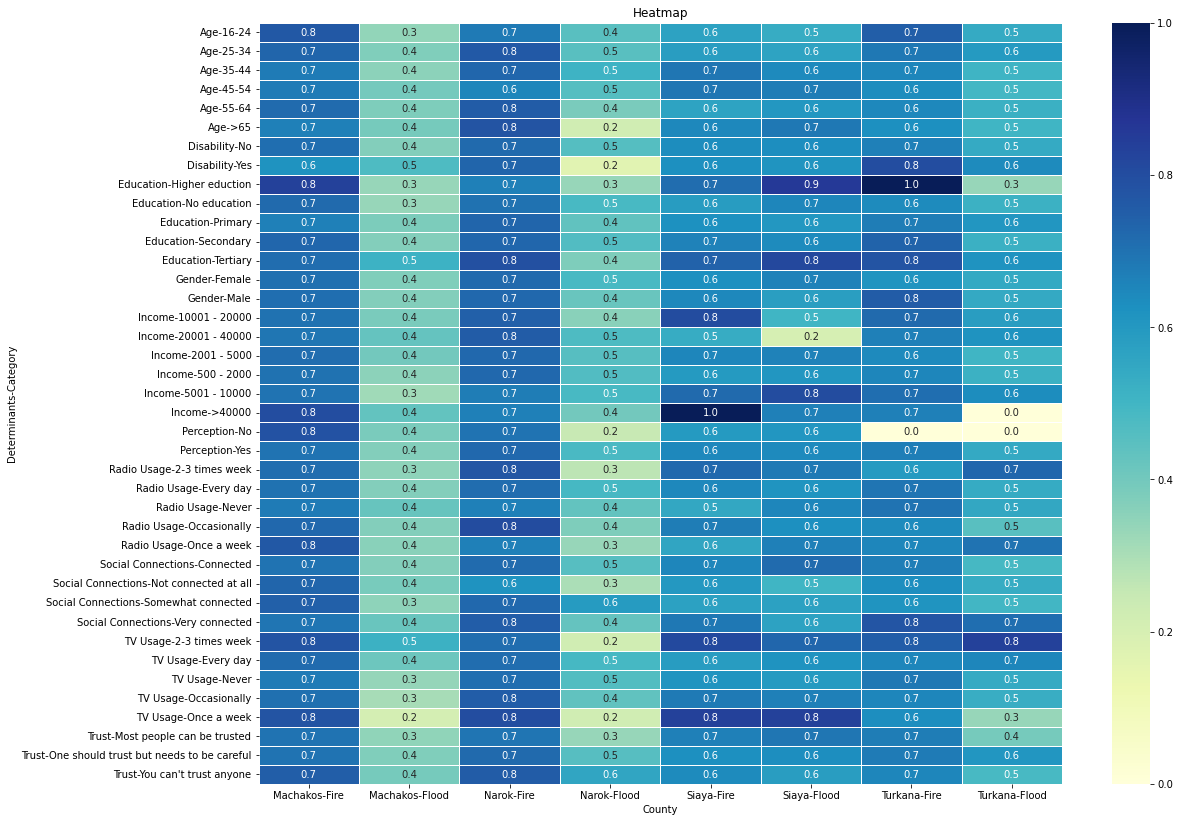

In [61]:
# Pivot the DataFrame for heatmap
pivot_df10 = df_melted.pivot(index= ['Determinants','Category'], columns='County', values= 'Value')

# Create a heatmap using seaborn
plt.figure(figsize=(18, 14))
sns.heatmap(pivot_df10, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap')
plt.show()

In [62]:
pivot_df12 = df_melted.pivot(index=['Determinants', 'Category'], columns='County', values='Value')

# Reorder the index and columns to match the original order
original_order = df_melted['County'].unique()
pivot_df12 = pivot_df12.reindex(index=main_df[['Determinants','Category']], columns=original_order)

In [63]:
pivot_df12

County                                                       Siaya-Flood  \
Determinants       Category                                                
Social Connections Very connected                               0.568889   
                   Connected                                    0.715054   
                   Somewhat connected                           0.574074   
                   Not connected at all                         0.500000   
Gender             Female                                       0.660985   
                   Male                                         0.580357   
Education          No education                                 0.650000   
                   Primary                                      0.603810   
                   Secondary                                    0.639640   
                   Tertiary                                     0.814815   
                   Higher eduction                              0.857143   
Income             500 - 2000                                   0.608434   
                   2001 - 5000                                  0.661538   
                   5001 - 10000                                 0.802083   
                   10001 - 20000                                0.500000   
                   20001 - 40000                                0.200000   
                   >40000                                       0.666667   
Trust              Most people can be trusted                   0.688889   
                   One should trust but needs to be careful     0.630237   
                   You can't trust anyone                       0.583333   
Perception         No                                           0.608333   
                   Yes                                          0.641770   
Age                16-24                                        0.533333   
                   25-34                                        0.564626   
                   35-44                                        0.644068   
                   45-54                                        0.672043   
                   55-64                                        0.602837   
                   >65                                          0.686275   
TV Usage           Every day                                    0.620833   
                   2-3 times week                               0.730159   
                   Once a week                                  0.833333   
                   Occasionally                                 0.666667   
                   Never                                        0.595420   
Radio Usage        Every day                                    0.615226   
                   2-3 times week                               0.681159   
                   Once a week                                  0.666667   
                   Occasionally                                 0.626984   
                   Never                                        0.648485   
Disability         No                                           0.629771   
                   Yes                                          0.613333   

County                                                       Machakos-Flood  \
Determinants       Category                                                   
Social Connections Very connected                                  0.419540   
                   Connected                                       0.368664   
                   Somewhat connected                              0.348958   
                   Not connected at all                            0.388889   
Gender             Female                                          0.372549   
                   Male                                            0.370833   
Education          No education                                    0.333333   
                   Primary                                         0.380952   
                 

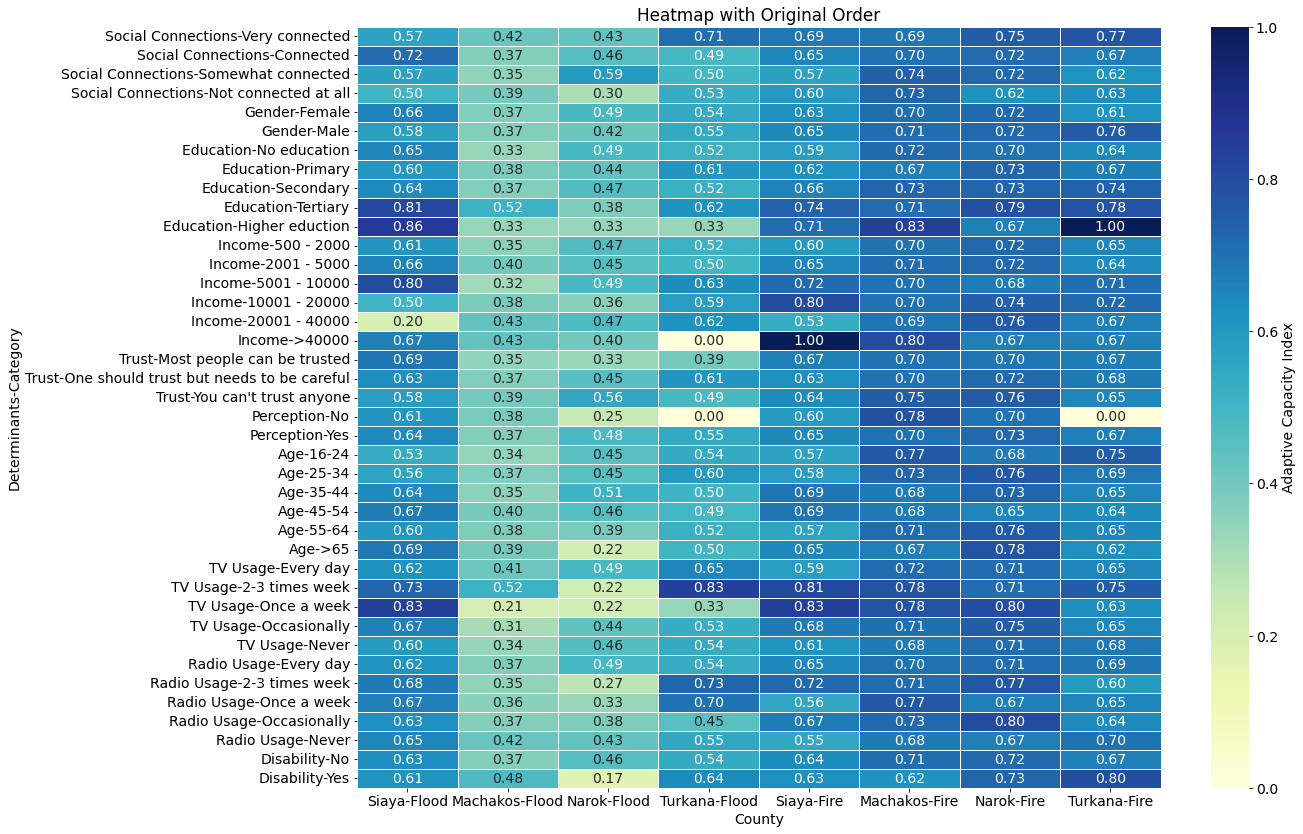

In [75]:
# Create a heatmap using seaborn
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(18, 14))
sns.heatmap(pivot_df12, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Adaptive Capacity Index'})
plt.title('Heatmap with Original Order')
plt.show()

In [65]:
# Pivot the DataFrame for heatmap
#pivot_df20 = df_melted3.pivot(index= ['Determinants','Category'], columns='County', values= 'Value')

# Reorder the index and columns to match the original order
#original_order = df_melted3['County'].unique()
#pivot_df20 = pivot_df20.reindex(index=new_df[['Determinants','Category']], columns=original_order)

# Create a heatmap using seaborn
#plt.figure(figsize=(15, 8))
#sns.heatmap(pivot_df20, annot=True, fmt=".1f", cmap='Blues', linewidths=.5)
#plt.title('Heatmap')
#plt.show()

In [66]:
#selected = ['Determinants', 'Category', 'Sum']
#new2_df = new_df[selected]
#new2_df

#cols = new2_df.columns.tolist()  # Get a list of all columns
#id_vars = ['Determinants', 'Category']  # Columns to keep as is
#value_vars = [col for col in cols if col not in id_vars]  # All other columns are 'County' columns

#df_melted4 = new2_df.melt(id_vars=id_vars, 
                    #value_vars=value_vars,
                    #var_name='County', 
                    #value_name='Value')

#df_melted4


#pivot_df23 = df_melted4.pivot(index=['Determinants', 'Category'], columns='County', values='Value')

# Reorder the index and columns to match the original order
#original_order = df_melted4['County'].unique()
#pivot_df23 = pivot_df23.reindex(index=new2_df[['Determinants','Category']], columns=original_order)

# Create a heatmap using seaborn
#plt.figure(figsize=(18, 14))
#sns.heatmap(pivot_df23, annot=True, fmt=".1f", cmap='Blues', linewidths=.5)
#plt.title('Heatmap')
#plt.show()


# All County Analysis - Fire

In [67]:
action_df20 = pd.read_excel('/Users/motunrayoajia/Downloads/Siaya_UPV_Utterances.xls', sheet_name='County Analysis')

#Action Analysis
#1. Connectedness

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df20['How well connected do you feel within the community?'] = pd.Categorical(action_df20['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_grouped_df = action_df20.groupby(['Category of Fire Actions', 'How well connected do you feel within the community?']).size().unstack(fill_value=0)

action_grouped_df = action_grouped_df.transpose()

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df20['How well connected do you feel within the community?'] = pd.Categorical(action_df20['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

total_counts = action_df20.groupby('How well connected do you feel within the community?')['Category of Fire Actions'].count()
percentage_df = action_grouped_df.div(total_counts, axis=0) * 100

# Create a new DataFrame with the same columns and index as the original DataFrame

fire_action_values = {
    'Direct Action': 3,
    'Ask for help': 2,
    'Migration': 1,
    'None': 0
}

multiplied_df = pd.DataFrame(columns=percentage_df.columns, index=percentage_df.index)

# Perform the multiplication
for column in percentage_df.columns:
    multiplied_df[column] = percentage_df[column] * fire_action_values[column]

multiplied_df

multiplied_df['Social Connections'] = multiplied_df.sum(axis=1)

multiplied_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How well connected do you feel within the community?': 'Category', 'Social Connections': 'Adaptive Capacity'}
multiplied_df = multiplied_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_df['Determinants'] = "Social Connections"
multiplied_df

#Create a df with only the first two
conn_df20 = multiplied_df[['Determinants', 'Category', 'Adaptive Capacity']]
conn_df20

#2. Gender

# Group by "category of actions" and "connectedness" and count the occurrences
action_gend_grouped_df = action_df20.groupby(['Category of Fire Actions','What is your gender?']).size().unstack(fill_value=0)

action_gend_grouped_df = action_gend_grouped_df.transpose()

total_gend_counts = action_df20.groupby('What is your gender?')['Category of Fire Actions'].count()
percent_gend_df = action_gend_grouped_df.div(total_gend_counts, axis=0) * 100


multiplied_gend_df = pd.DataFrame(columns=percent_gend_df.columns, index=percent_gend_df.index)

# Perform the multiplication
for column in percent_gend_df.columns:
    multiplied_gend_df[column] = percent_gend_df[column] * fire_action_values[column]

multiplied_gend_df

multiplied_gend_df['Gender'] = multiplied_gend_df.sum(axis=1)

multiplied_gend_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is your gender?': 'Category', 'Gender': 'Adaptive Capacity'}
multiplied_gend_df = multiplied_gend_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_gend_df['Determinants'] = "Gender"
multiplied_gend_df

#Create a df with only the first two
gend_df20 = multiplied_gend_df[['Determinants', 'Category', 'Adaptive Capacity']]
gend_df20

#3. Education

custom_edu_order = ['No education','Primary', 'Secondary', 'Tertiary', 'Higher eduction']

action_df20['What is the highest level of education have you completed?'] = pd.Categorical(action_df20['What is the highest level of education have you completed?'], categories = custom_edu_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_edu_grouped_df = action_df20.groupby(['Category of Fire Actions', 'What is the highest level of education have you completed?']).size().unstack(fill_value=0)

action_edu_grouped_df = action_edu_grouped_df.transpose()


#Stacked Bar chart for Education
#action_df['What is the highest level of education have you completed?'] = pd.Categorical(action_df['What is the highest level of education have you completed?'], categories=custom_edu_order, ordered=True)

total_edu_counts = action_df20.groupby('What is the highest level of education have you completed?')['Category of Fire Actions'].count()
percent_edu_df = action_edu_grouped_df.div(total_edu_counts, axis=0) * 100


multiplied_edu_df = pd.DataFrame(columns=percent_edu_df.columns, index=percent_edu_df.index)

# Perform the multiplication
for column in percent_edu_df.columns:
    multiplied_edu_df[column] = percent_edu_df[column] * fire_action_values[column]

multiplied_edu_df['Education'] = multiplied_edu_df.sum(axis=1)

multiplied_edu_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is the highest level of education have you completed?': 'Category', 'Education': 'Adaptive Capacity'}
multiplied_edu_df = multiplied_edu_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_edu_df['Determinants'] = "Education"
multiplied_edu_df

#Create a df with only the first two
edu_df20 = multiplied_edu_df[['Determinants', 'Category', 'Adaptive Capacity']]
edu_df20

#4. Income
# Convert "connectedness" column to categorical with custom order
custom_income_order =  ["500 - 2000", "2001 - 5000", "5001 - 10000", "10001 - 20000", "20001 - 40000", ">40000" ]

action_df20['Income Category'] = pd.Categorical(action_df20['Income Category'], categories = custom_income_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_income_grouped_df = action_df20.groupby(['Income Category', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Income
action_df20['Income Category'] = pd.Categorical(action_df20['Income Category'], categories=custom_income_order, ordered=True)

total_income_counts = action_df20.groupby('Income Category')['Category of Fire Actions'].count()
percent_income_df = action_income_grouped_df.div(total_income_counts, axis=0) * 100

multiplied_income_df = pd.DataFrame(columns=percent_income_df.columns, index=percent_income_df.index)

# Perform the multiplication
for column in percent_income_df.columns:
    multiplied_income_df[column] = percent_income_df[column] * fire_action_values[column]

multiplied_income_df

multiplied_income_df['Income'] = multiplied_income_df.sum(axis=1)

multiplied_income_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Income Category': 'Category', 'Income': 'Adaptive Capacity'}
multiplied_income_df = multiplied_income_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_income_df['Determinants'] = "Income"
multiplied_income_df

#Create a df with only the first two
income_df20 = multiplied_income_df[['Determinants', 'Category', 'Adaptive Capacity']]
income_df20

#5. Trust
# Group by "category of actions" and "trust" and count the occurrences
action_trust_grouped_df = action_df20.groupby(['Trust', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Trust

total_trust_counts = action_df20.groupby('Trust')['Category of Fire Actions'].count()
percent_trust_df = action_trust_grouped_df.div(total_trust_counts, axis=0) * 100

multiplied_trust_df = pd.DataFrame(columns=percent_trust_df.columns, index=percent_trust_df.index)

# Perform the multiplication
for column in percent_trust_df.columns:
    multiplied_trust_df[column] = percent_trust_df[column] * fire_action_values[column]

multiplied_trust_df

multiplied_trust_df['Trust_'] = multiplied_trust_df.sum(axis=1)

multiplied_trust_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Trust': 'Category', 'Trust_': 'Adaptive Capacity'}
multiplied_trust_df = multiplied_trust_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_trust_df['Determinants'] = "Trust"
multiplied_trust_df

#Create a df with only the first two
trust_df20 = multiplied_trust_df[['Determinants', 'Category', 'Adaptive Capacity']]
trust_df20

#6. Perception
# Convert "access to information" column to categorical with custom order

action_perc_grouped_df = action_df20.groupby(['Are you worried about climate change?', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Information/Perception
#action_df['Information'] = pd.Categorical(action_df['How well connected do you feel within the community?'], categories=custom_income_order, ordered=True)

total_perc_counts = action_df20.groupby('Are you worried about climate change?')['Category of Fire Actions'].count()
percent_perc_df = action_perc_grouped_df.div(total_perc_counts, axis=0) * 100

multiplied_perc_df = pd.DataFrame(columns=percent_perc_df.columns, index=percent_perc_df.index)

# Perform the multiplication
for column in percent_perc_df.columns:
    multiplied_perc_df[column] = percent_perc_df[column] * fire_action_values[column]

multiplied_perc_df['Perception'] = multiplied_perc_df.sum(axis=1)

multiplied_perc_df

multiplied_perc_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Are you worried about climate change?': 'Category', 'Perception': 'Adaptive Capacity'}
multiplied_perc_df = multiplied_perc_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_perc_df['Determinants'] = "Perception"
multiplied_perc_df

#Create a df with only the first two
perc_df20 = multiplied_perc_df[['Determinants', 'Category', 'Adaptive Capacity']]
perc_df20

#7. Age

# Convert "age" column to categorical with custom order
custom_age_order =  ["16-24", "25-34", "35-44", "45-54", "55-64", ">65"]

action_df20['Age Category'] = pd.Categorical(action_df20['Age Category'], categories = custom_age_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_age_grouped_df = action_df20.groupby(['Age Category', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Age
total_age_counts = action_df20.groupby('Age Category')['Category of Fire Actions'].count()
percent_age_df = action_age_grouped_df.div(total_age_counts, axis=0) * 100

multiplied_age_df = pd.DataFrame(columns=percent_age_df.columns, index=percent_age_df.index)

# Perform the multiplication
for column in percent_age_df.columns:
    multiplied_age_df[column] = percent_age_df[column] * fire_action_values[column]

multiplied_age_df

multiplied_age_df['Age'] = multiplied_age_df.sum(axis=1)

multiplied_age_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Age Category': 'Category', 'Age': 'Adaptive Capacity'}
multiplied_age_df = multiplied_age_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_age_df['Determinants'] = "Age"
multiplied_age_df

#Create a df with only the first two
age_df20 = multiplied_age_df[['Determinants', 'Category', 'Adaptive Capacity']]
age_df20

#8. Info 1 - TV

custom_info_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df20['How often do you watch TV?'] = pd.Categorical(action_df20['How often do you watch TV?'], categories = custom_info_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info_grouped_df = action_df20.groupby(['How often do you watch TV?', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 1
action_df20['How often do you watch TV?'] = pd.Categorical(action_df20['How often do you watch TV?'], categories=custom_info_order, ordered=True)

total_info_counts = action_df20.groupby('How often do you watch TV?')['Category of Fire Actions'].count()
percent_info_df = action_info_grouped_df.div(total_info_counts, axis=0) * 100

multiplied_info_df = pd.DataFrame(columns=percent_info_df.columns, index=percent_info_df.index)

# Perform the multiplication
for column in percent_info_df.columns:
    multiplied_info_df[column] = percent_info_df[column] * fire_action_values[column]

multiplied_info_df

multiplied_info_df['TV Usage'] = multiplied_info_df.sum(axis=1)

multiplied_info_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you watch TV?': 'Category', 'TV Usage': 'Adaptive Capacity'}
multiplied_info_df = multiplied_info_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info_df['Determinants'] = "TV Usage"
multiplied_info_df

#Create a df with only the first two
info_df20 = multiplied_info_df[['Determinants', 'Category', 'Adaptive Capacity']]
info_df20

#9. Info Access 2 - Radio

custom_info2_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df20['How often do you listen to the Radio?'] = pd.Categorical(action_df20['How often do you listen to the Radio?'], categories = custom_info2_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info2_grouped_df = action_df20.groupby(['How often do you listen to the Radio?', 'Category of Fire Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 2
action_df20['How often do you listen to the Radio?'] = pd.Categorical(action_df20['How often do you listen to the Radio?'], categories=custom_info2_order, ordered=True)

total_info2_counts = action_df20.groupby('How often do you listen to the Radio?')['Category of Fire Actions'].count()
percent_info2_df = action_info2_grouped_df.div(total_info2_counts, axis=0) * 100

multiplied_info2_df = pd.DataFrame(columns=percent_info2_df.columns, index=percent_info2_df.index)

# Perform the multiplication
for column in percent_info2_df.columns:
    multiplied_info2_df[column] = percent_info2_df[column] * fire_action_values[column]

multiplied_info2_df['Radio Usage'] = multiplied_info2_df.sum(axis=1)

multiplied_info2_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you listen to the Radio?': 'Category', 'Radio Usage': 'Adaptive Capacity'}
multiplied_info2_df = multiplied_info2_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info2_df['Determinants'] = "Radio Usage"
multiplied_info2_df

#Create a df with only the first two
info2_df20 = multiplied_info2_df[['Determinants', 'Category', 'Adaptive Capacity']]
info2_df20

#10. Disability

# Group by "Disability" and "Category of Flood Actions" 
action_dis_grouped_df = action_df20.groupby(['Do you have a disability?', 'Category of Fire Actions']).size().unstack(fill_value=0)


#Stacked Bar Chart for Disability

total_dis_counts = action_df20.groupby('Do you have a disability?')['Category of Fire Actions'].count()
percent_dis_df = action_dis_grouped_df.div(total_dis_counts, axis=0) * 100


multiplied_dis_df = pd.DataFrame(columns=percent_dis_df.columns, index=percent_dis_df.index)

# Perform the multiplication
for column in percent_dis_df.columns:
    multiplied_dis_df[column] = percent_dis_df[column] * fire_action_values[column]

multiplied_dis_df

multiplied_dis_df['Disability'] = multiplied_dis_df.sum(axis=1)

multiplied_dis_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Do you have a disability?': 'Category', 'Disability': 'Adaptive Capacity'}
multiplied_dis_df = multiplied_dis_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_dis_df['Determinants'] = "Disability"
multiplied_dis_df

#Create a df with only the first two
dis_df20 = multiplied_dis_df[['Determinants', 'Category', 'Adaptive Capacity']]
dis_df20

dfs20 = [conn_df20, gend_df20, edu_df20, income_df20, trust_df20, perc_df20, age_df20, info_df20, info2_df20, dis_df20]  # List of DataFrames

# Concatenate the DataFrames vertically
combined_df_county_fire = pd.concat(dfs20, ignore_index=True)
combined_df_county_fire

Category of Fire Actions,Determinants,Category,Adaptive Capacity
0,Social Connections,Very connected,218.045113
1,Social Connections,Connected,206.529210
2,Social Connections,Somewhat connected,193.584906
3,Social Connections,Not connected at all,195.000000
4,Gender,Female,199.850299
5,Gender,Male,212.922465
6,Education,No education,196.916300
7,Education,Primary,198.839907
8,Education,Secondary,214.705882
9,Education,Tertiary,225.000000


# All County Analysis - Flood

In [68]:
action_df30 = pd.read_excel('/Users/motunrayoajia/Downloads/Siaya_UPV_Utterances.xls', sheet_name='County Analysis')

#Action Analysis
#1. Connectedness

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df30['How well connected do you feel within the community?'] = pd.Categorical(action_df30['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_grouped_df = action_df30.groupby(['Category of Flood Actions', 'How well connected do you feel within the community?']).size().unstack(fill_value=0)

action_grouped_df = action_grouped_df.transpose()

custom_order = ['Very connected', 'Connected', 'Somewhat connected', 'Not connected at all']  # Replace this with your desired order

# Convert "connectedness" column to categorical with custom order
action_df30['How well connected do you feel within the community?'] = pd.Categorical(action_df30['How well connected do you feel within the community?'], categories=custom_order, ordered=True)

total_counts = action_df30.groupby('How well connected do you feel within the community?')['Category of Flood Actions'].count()
percentage_df = action_grouped_df.div(total_counts, axis=0) * 100

# Create a new DataFrame with the same columns and index as the original DataFrame

flood_action_values = {
    'Direct Action': 3,
    'Ask for help': 2,
    'Migration': 1,
    'None': 0
}

multiplied_df = pd.DataFrame(columns=percentage_df.columns, index=percentage_df.index)

# Perform the multiplication
for column in percentage_df.columns:
    multiplied_df[column] = percentage_df[column] * flood_action_values[column]

multiplied_df

multiplied_df['Social Connections'] = multiplied_df.sum(axis=1)

multiplied_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How well connected do you feel within the community?': 'Category', 'Social Connections': 'Adaptive Capacity'}
multiplied_df = multiplied_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_df['Determinants'] = "Social Connections"
multiplied_df

#Create a df with only the first two
conn_df30 = multiplied_df[['Determinants', 'Category', 'Adaptive Capacity']]
conn_df30

#2. Gender

# Group by "category of actions" and "connectedness" and count the occurrences
action_gend_grouped_df = action_df30.groupby(['Category of Flood Actions','What is your gender?']).size().unstack(fill_value=0)

action_gend_grouped_df = action_gend_grouped_df.transpose()

total_gend_counts = action_df30.groupby('What is your gender?')['Category of Flood Actions'].count()
percent_gend_df = action_gend_grouped_df.div(total_gend_counts, axis=0) * 100


multiplied_gend_df = pd.DataFrame(columns=percent_gend_df.columns, index=percent_gend_df.index)

# Perform the multiplication
for column in percent_gend_df.columns:
    multiplied_gend_df[column] = percent_gend_df[column] * flood_action_values[column]

multiplied_gend_df

multiplied_gend_df['Gender'] = multiplied_gend_df.sum(axis=1)

multiplied_gend_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is your gender?': 'Category', 'Gender': 'Adaptive Capacity'}
multiplied_gend_df = multiplied_gend_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_gend_df['Determinants'] = "Gender"
multiplied_gend_df

#Create a df with only the first two
gend_df30 = multiplied_gend_df[['Determinants', 'Category', 'Adaptive Capacity']]
gend_df30

#3. Education

custom_edu_order = ['No education','Primary', 'Secondary', 'Tertiary', 'Higher eduction']

action_df30['What is the highest level of education have you completed?'] = pd.Categorical(action_df30['What is the highest level of education have you completed?'], categories = custom_edu_order, ordered=True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_edu_grouped_df = action_df30.groupby(['Category of Flood Actions', 'What is the highest level of education have you completed?']).size().unstack(fill_value=0)

action_edu_grouped_df = action_edu_grouped_df.transpose()


#Stacked Bar chart for Education
#action_df['What is the highest level of education have you completed?'] = pd.Categorical(action_df['What is the highest level of education have you completed?'], categories=custom_edu_order, ordered=True)

total_edu_counts = action_df30.groupby('What is the highest level of education have you completed?')['Category of Flood Actions'].count()
percent_edu_df = action_edu_grouped_df.div(total_edu_counts, axis=0) * 100


multiplied_edu_df = pd.DataFrame(columns=percent_edu_df.columns, index=percent_edu_df.index)

# Perform the multiplication
for column in percent_edu_df.columns:
    multiplied_edu_df[column] = percent_edu_df[column] * fire_action_values[column]

multiplied_edu_df['Education'] = multiplied_edu_df.sum(axis=1)

multiplied_edu_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'What is the highest level of education have you completed?': 'Category', 'Education': 'Adaptive Capacity'}
multiplied_edu_df = multiplied_edu_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_edu_df['Determinants'] = "Education"
multiplied_edu_df

#Create a df with only the first two
edu_df30 = multiplied_edu_df[['Determinants', 'Category', 'Adaptive Capacity']]
edu_df30

#4. Income
# Convert "connectedness" column to categorical with custom order
custom_income_order =  ["500 - 2000", "2001 - 5000", "5001 - 10000", "10001 - 20000", "20001 - 40000", ">40000" ]

action_df30['Income Category'] = pd.Categorical(action_df30['Income Category'], categories = custom_income_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_income_grouped_df = action_df30.groupby(['Income Category', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Income
action_df30['Income Category'] = pd.Categorical(action_df30['Income Category'], categories=custom_income_order, ordered=True)

total_income_counts = action_df30.groupby('Income Category')['Category of Flood Actions'].count()
percent_income_df = action_income_grouped_df.div(total_income_counts, axis=0) * 100

multiplied_income_df = pd.DataFrame(columns=percent_income_df.columns, index=percent_income_df.index)

# Perform the multiplication
for column in percent_income_df.columns:
    multiplied_income_df[column] = percent_income_df[column] * flood_action_values[column]

multiplied_income_df

multiplied_income_df['Income'] = multiplied_income_df.sum(axis=1)

multiplied_income_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Income Category': 'Category', 'Income': 'Adaptive Capacity'}
multiplied_income_df = multiplied_income_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_income_df['Determinants'] = "Income"
multiplied_income_df

#Create a df with only the first two
income_df30 = multiplied_income_df[['Determinants', 'Category', 'Adaptive Capacity']]
income_df30

#5. Trust
# Group by "category of actions" and "trust" and count the occurrences
action_trust_grouped_df = action_df30.groupby(['Trust', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Trust

total_trust_counts = action_df30.groupby('Trust')['Category of Flood Actions'].count()
percent_trust_df = action_trust_grouped_df.div(total_trust_counts, axis=0) * 100

multiplied_trust_df = pd.DataFrame(columns=percent_trust_df.columns, index=percent_trust_df.index)

# Perform the multiplication
for column in percent_trust_df.columns:
    multiplied_trust_df[column] = percent_trust_df[column] * flood_action_values[column]

multiplied_trust_df

multiplied_trust_df['Trust_'] = multiplied_trust_df.sum(axis=1)

multiplied_trust_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Trust': 'Category', 'Trust_': 'Adaptive Capacity'}
multiplied_trust_df = multiplied_trust_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_trust_df['Determinants'] = "Trust"
multiplied_trust_df

#Create a df with only the first two
trust_df30 = multiplied_trust_df[['Determinants', 'Category', 'Adaptive Capacity']]
trust_df30

#6. Perception
# Convert "access to information" column to categorical with custom order

action_perc_grouped_df = action_df30.groupby(['Are you worried about climate change?', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Information/Perception
#action_df['Information'] = pd.Categorical(action_df['How well connected do you feel within the community?'], categories=custom_income_order, ordered=True)

total_perc_counts = action_df30.groupby('Are you worried about climate change?')['Category of Flood Actions'].count()
percent_perc_df = action_perc_grouped_df.div(total_perc_counts, axis=0) * 100

multiplied_perc_df = pd.DataFrame(columns=percent_perc_df.columns, index=percent_perc_df.index)

# Perform the multiplication
for column in percent_perc_df.columns:
    multiplied_perc_df[column] = percent_perc_df[column] * flood_action_values[column]

multiplied_perc_df['Perception'] = multiplied_perc_df.sum(axis=1)

multiplied_perc_df

multiplied_perc_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Are you worried about climate change?': 'Category', 'Perception': 'Adaptive Capacity'}
multiplied_perc_df = multiplied_perc_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_perc_df['Determinants'] = "Perception"
multiplied_perc_df

#Create a df with only the first two
perc_df30 = multiplied_perc_df[['Determinants', 'Category', 'Adaptive Capacity']]
perc_df30

#7. Age

# Convert "age" column to categorical with custom order
custom_age_order =  ["16-24", "25-34", "35-44", "45-54", "55-64", ">65"]

action_df30['Age Category'] = pd.Categorical(action_df20['Age Category'], categories = custom_age_order, ordered = True)

# Group by "category of actions" and "connectedness" and count the occurrences
action_age_grouped_df = action_df30.groupby(['Age Category', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Age
total_age_counts = action_df30.groupby('Age Category')['Category of Flood Actions'].count()
percent_age_df = action_age_grouped_df.div(total_age_counts, axis=0) * 100

multiplied_age_df = pd.DataFrame(columns=percent_age_df.columns, index=percent_age_df.index)

# Perform the multiplication
for column in percent_age_df.columns:
    multiplied_age_df[column] = percent_age_df[column] * flood_action_values[column]

multiplied_age_df

multiplied_age_df['Age'] = multiplied_age_df.sum(axis=1)

multiplied_age_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Age Category': 'Category', 'Age': 'Adaptive Capacity'}
multiplied_age_df = multiplied_age_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_age_df['Determinants'] = "Age"
multiplied_age_df

#Create a df with only the first two
age_df30 = multiplied_age_df[['Determinants', 'Category', 'Adaptive Capacity']]
age_df30

#8. Info 1 - TV

custom_info_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df30['How often do you watch TV?'] = pd.Categorical(action_df30['How often do you watch TV?'], categories = custom_info_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info_grouped_df = action_df30.groupby(['How often do you watch TV?', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 1
action_df30['How often do you watch TV?'] = pd.Categorical(action_df30['How often do you watch TV?'], categories=custom_info_order, ordered=True)

total_info_counts = action_df30.groupby('How often do you watch TV?')['Category of Flood Actions'].count()
percent_info_df = action_info_grouped_df.div(total_info_counts, axis=0) * 100

multiplied_info_df = pd.DataFrame(columns=percent_info_df.columns, index=percent_info_df.index)

# Perform the multiplication
for column in percent_info_df.columns:
    multiplied_info_df[column] = percent_info_df[column] * flood_action_values[column]

multiplied_info_df

multiplied_info_df['TV Usage'] = multiplied_info_df.sum(axis=1)

multiplied_info_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you watch TV?': 'Category', 'TV Usage': 'Adaptive Capacity'}
multiplied_info_df = multiplied_info_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info_df['Determinants'] = "TV Usage"
multiplied_info_df

#Create a df with only the first two
info_df30 = multiplied_info_df[['Determinants', 'Category', 'Adaptive Capacity']]
info_df30

#9. Info Access 2 - Radio

custom_info2_order =  ["Every day", "2-3 times week", "Once a week", "Occasionally", "Never"]

action_df30['How often do you listen to the Radio?'] = pd.Categorical(action_df30['How often do you listen to the Radio?'], categories = custom_info2_order, ordered = True)

# Group by "TV use" and "Category of Flood Actions" and count the occurrences
action_info2_grouped_df = action_df30.groupby(['How often do you listen to the Radio?', 'Category of Flood Actions']).size().unstack(fill_value=0)

#Stacked Bar Chart for Info 2
action_df30['How often do you listen to the Radio?'] = pd.Categorical(action_df30['How often do you listen to the Radio?'], categories=custom_info2_order, ordered=True)

total_info2_counts = action_df30.groupby('How often do you listen to the Radio?')['Category of Flood Actions'].count()
percent_info2_df = action_info2_grouped_df.div(total_info2_counts, axis=0) * 100

multiplied_info2_df = pd.DataFrame(columns=percent_info2_df.columns, index=percent_info2_df.index)

# Perform the multiplication
for column in percent_info2_df.columns:
    multiplied_info2_df[column] = percent_info2_df[column] * flood_action_values[column]

multiplied_info2_df['Radio Usage'] = multiplied_info2_df.sum(axis=1)

multiplied_info2_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'How often do you listen to the Radio?': 'Category', 'Radio Usage': 'Adaptive Capacity'}
multiplied_info2_df = multiplied_info2_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_info2_df['Determinants'] = "Radio Usage"
multiplied_info2_df

#Create a df with only the first two
info2_df30 = multiplied_info2_df[['Determinants', 'Category', 'Adaptive Capacity']]
info2_df30

#10. Disability

# Group by "Disability" and "Category of Flood Actions" 
action_dis_grouped_df = action_df30.groupby(['Do you have a disability?', 'Category of Flood Actions']).size().unstack(fill_value=0)


#Stacked Bar Chart for Disability

total_dis_counts = action_df30.groupby('Do you have a disability?')['Category of Flood Actions'].count()
percent_dis_df = action_dis_grouped_df.div(total_dis_counts, axis=0) * 100


multiplied_dis_df = pd.DataFrame(columns=percent_dis_df.columns, index=percent_dis_df.index)

# Perform the multiplication
for column in percent_dis_df.columns:
    multiplied_dis_df[column] = percent_dis_df[column] * flood_action_values[column]

multiplied_dis_df

multiplied_dis_df['Disability'] = multiplied_dis_df.sum(axis=1)

multiplied_dis_df.reset_index(inplace=True)

#Rename Disability column to Adaptive Capacity and Do you have a disability? to Category.
new_column_names = {'Do you have a disability?': 'Category', 'Disability': 'Adaptive Capacity'}
multiplied_dis_df = multiplied_dis_df.rename(columns=new_column_names)

#Create a column with the Determinant name
multiplied_dis_df['Determinants'] = "Disability"
multiplied_dis_df

#Create a df with only the first two
dis_df30 = multiplied_dis_df[['Determinants', 'Category', 'Adaptive Capacity']]
dis_df30

dfs30 = [conn_df30, gend_df30, edu_df30, income_df30, trust_df30, perc_df30, age_df30, info_df30, info2_df30, dis_df30]  # List of DataFrames

# Concatenate the DataFrames vertically
combined_df_county_flood = pd.concat(dfs30, ignore_index=True)
combined_df_county_flood

Category of Flood Actions,Determinants,Category,Adaptive Capacity
0,Social Connections,Very connected,159.701493
1,Social Connections,Connected,145.101351
2,Social Connections,Somewhat connected,146.153846
3,Social Connections,Not connected at all,131.578947
4,Gender,Female,154.761905
5,Gender,Male,139.121756
6,Education,No education,153.043478
7,Education,Primary,154.090909
8,Education,Secondary,140.540541
9,Education,Tertiary,161.111111


In [69]:
data_frame2 = [combined_df_county_flood, combined_df_county_fire]

# Concatenate the DataFrames horizontally
combined_df2 = pd.concat(data_frame2, axis=1)
combined_df2

,Determinants,Category,Adaptive Capacity,Determinants,Category,Adaptive Capacity
0,Social Connections,Very connected,159.701493,Social Connections,Very connected,218.045113
1,Social Connections,Connected,145.101351,Social Connections,Connected,206.529210
2,Social Connections,Somewhat connected,146.153846,Social Connections,Somewhat connected,193.584906
3,Social Connections,Not connected at all,131.578947,Social Connections,Not connected at all,195.000000
4,Gender,Female,154.761905,Gender,Female,199.850299
5,Gender,Male,139.121756,Gender,Male,212.922465
6,Education,No education,153.043478,Education,No education,196.916300
7,Education,Primary,154.090909,Education,Primary,198.839907
8,Education,Secondary,140.540541,Education,Secondary,214.705882
9,Education,Tertiary,161.111111,Education,Tertiary,225.000000


In [70]:
main_df2 = combined_df_county_flood.copy()  # Create a copy of the main DataFrame to preserve original data

# Loop through the DataFrames and concatenate them horizontally (axis=1)
for df in data_frame2:
    main_df2 = pd.concat([main_df2, df.iloc[:, -1]], axis=1)

new_column_names2 = ['Index','Determinants', 'Category', 'Flood', 'Fire']
main_df2.columns = new_column_names2

main_df2

main_df2.drop(columns=["Category"], inplace=True)

new_column_names2 = ['Determinants', 'Category', 'Flood', 'Fire']
main_df2.columns = new_column_names2

main_df2

,Determinants,Category,Flood,Fire
0,Social Connections,Very connected,159.701493,218.045113
1,Social Connections,Connected,145.101351,206.529210
2,Social Connections,Somewhat connected,146.153846,193.584906
3,Social Connections,Not connected at all,131.578947,195.000000
4,Gender,Female,154.761905,199.850299
5,Gender,Male,139.121756,212.922465
6,Education,No education,153.043478,196.916300
7,Education,Primary,154.090909,198.839907
8,Education,Secondary,140.540541,214.705882
9,Education,Tertiary,161.111111,225.000000


In [71]:
main_df2

# Divide the values in the last two columns by 300
main_df2.iloc[:, -2:] = main_df2.iloc[:, -2:] / 300

main_df2

,Determinants,Category,Flood,Fire
0,Social Connections,Very connected,0.532338,0.726817
1,Social Connections,Connected,0.483671,0.688431
2,Social Connections,Somewhat connected,0.487179,0.645283
3,Social Connections,Not connected at all,0.438596,0.650000
4,Gender,Female,0.515873,0.666168
5,Gender,Male,0.463739,0.709742
6,Education,No education,0.510145,0.656388
7,Education,Primary,0.513636,0.662800
8,Education,Secondary,0.468468,0.715686
9,Education,Tertiary,0.537037,0.750000


In [72]:
cols = main_df2.columns.tolist()  # Get a list of all columns
id_vars = ['Determinants', 'Category']  # Columns to keep as is
value_vars = [col for col in cols if col not in id_vars]  # All other columns are 'County' columns

df_melted3 = main_df2.melt(id_vars=id_vars, 
                    value_vars=value_vars,
                    var_name='Climate Event', 
                    value_name='Value')

df_melted3

,Determinants,Category,Climate Event,Value
0,Social Connections,Very connected,Flood,0.532338
1,Social Connections,Connected,Flood,0.483671
2,Social Connections,Somewhat connected,Flood,0.487179
3,Social Connections,Not connected at all,Flood,0.438596
4,Gender,Female,Flood,0.515873
...,...,...,...,...
75,Radio Usage,Once a week,Fire,0.674419
76,Radio Usage,Occasionally,Fire,0.697318
77,Radio Usage,Never,Fire,0.650794
78,Disability,No,Fire,0.685383


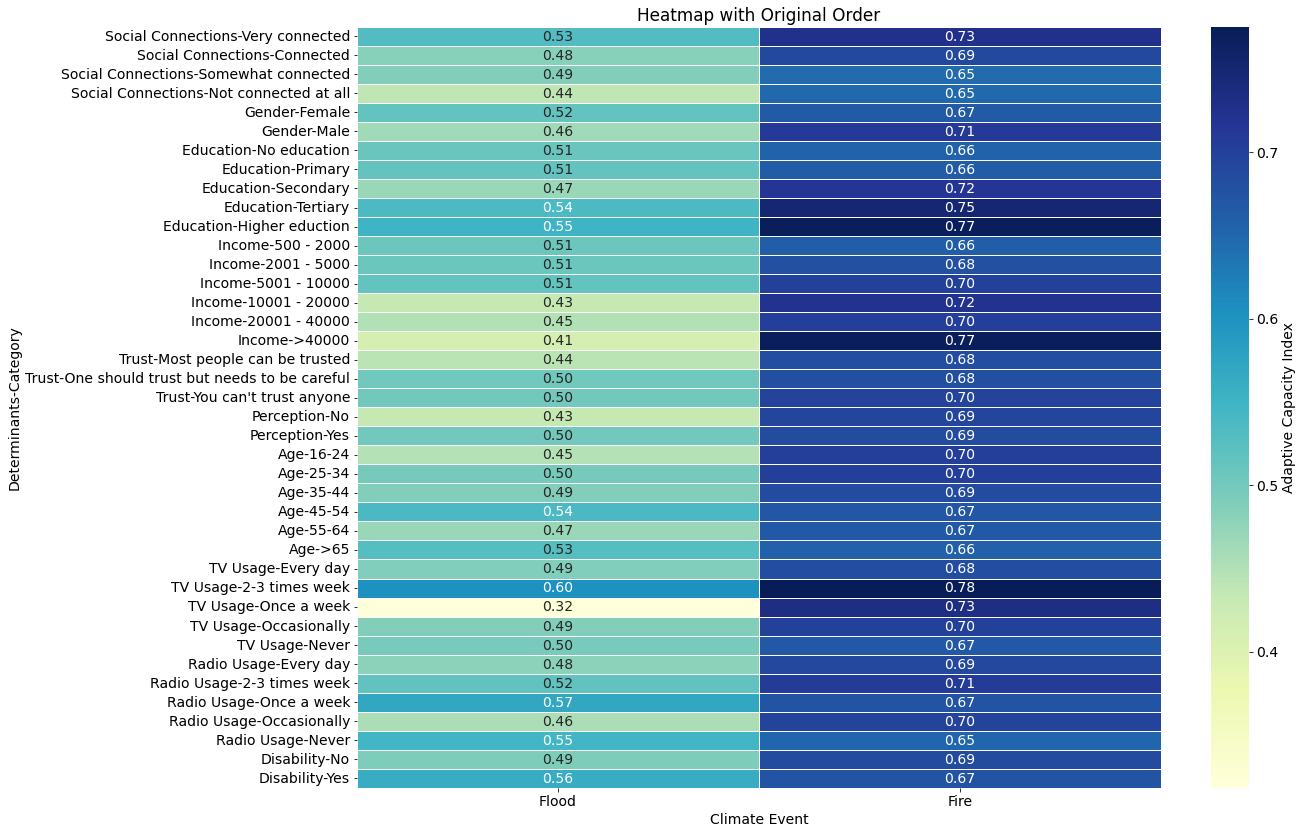

In [77]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
pivot_df30 = df_melted3.pivot(index=['Determinants', 'Category'], columns='Climate Event', values='Value')

# Reorder the index and columns to match the original order
original_order = df_melted3['Climate Event'].unique()
pivot_df30 = pivot_df30.reindex(index=main_df[['Determinants','Category']], columns=original_order)

# Create a heatmap using seaborn
plt.figure(figsize=(18, 14))
sns.heatmap(pivot_df30, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Adaptive Capacity Index'})
plt.title('Heatmap with Original Order')
plt.show()